In [180]:
%config InlineBackend.figure_format ='retina'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn

In [2]:
# additional setup of the tools

sns.set_theme(style="whitegrid")

**Problem**

We need to predict house sale price.

In [3]:
trainDf = pd.read_csv("data/train.csv")
testDf = pd.read_csv("data/test.csv")

fullDf = pd.concat([trainDf, testDf], sort=True).reset_index(drop=True)

## Given Information
* House Properties
    * Construction Date [YearBuilt]
    * Remodeling Date [YearRemodAdd]
    * Dwelling Class [BldgType] and Subclass [MSSubClass]
    * House Style [HouseStyle]
    * Area (sq. feets) [LotArea]
    * Shape [LotShape]
    * Flatness [LandContour] and slope [LandSlope]
    * Utilities (Gas, water, septic) [Utilities]
    * Overral Material and Finish Quality Rate [OverallQual]
    * Overral Condition Rate [OverallCond]
    * ? [LotConfig]
* House Access
    * Road Access [Street] [LotFrontage]
    * Alley Access [Alley]
    * House Road Connection [LotFrontage]
* House Location
    * Neighborhood (Phisical Location) [Neighborhood]
    * Zoning classification [MSZoning] (https://www.investopedia.com/terms/z/zoning.asp#:~:text=Zoning%20allows%20local%20governments%20to,among%20other%20more%20specific%20designations.)
    * Location Conditions (1 or 2) [Condition1][Condition2]
* Roof Properties
    * Roof Style [RoofStyle]
    * Roof Material [RoofMatl]
* Exterior
    * Exterior Covering (1 or 2 materials) [Exterior1st] [Exterior2nd]
    * Exterior Material Quality [ExterQual]
    * Exterior Material Condition [ExterCond]
* Masonry veneer
    * Masonry Veneer Type [MasVnrType]
    * Masonry Veneer Area [MasVnrArea]
* Basement
    * Foundation Type (stone, wood, etc) [Foundation]
    * Basement Quality [BsmtQual]
    * Basement Condition [BsmtCond]
    * Basement Exposure [BsmtExposure] https://adampillmore.wordpress.com/2010/02/15/basements/#:~:text=A%20walkout%20lot%20has%20at,the%20rear%20of%20the%20home.&text=A%20garden%2Dlevel%20lot%20is,necessary%20for%20a%20walkout%20condition.
    * Basement finished area rating (1 or 2) [BsmtFinType1][BsmtFinType2]
    * Basement Finished area (1 or 2) [BsmtFinSF1] [BsmtFinSF2]
    * Basement Unfinished Area [BsmtUnfSF]
    * Total Basement Area [TotalBsmtSF]
* Heating
    * Heating Type [Heating]
    * Heating Quality and Condition Rate [HeatingQC]
* Air Condition
    * Is Central Air Condition? [CentralAir]
* Electrical System Type [Electrical]
* Floors
    *  First Floor Area [1stFlrSF]
    * Second Floor Area [2ndFlrSF]
* ? [LowQualFinSF]
* Above Ground Living Area [GrLivArea]
* Bathroom
    * Basement Full Bathroom [BsmtFullBath]
    * Basement Half Bathroom [BsmtHalfBath]
    * Full bathroom above grade [FullBath]
    * Half bathroom above grade [HalfBath]
* Bedroom
    * Bedroom above grade (w/o basement bedrooms) [BedroomAbvGr]
* Kitchen
    * Kitchen Above Grade [KitchenAbvGr]
    * Kitchen Quality [KitchenQual]
* Total Rooms above grade (w/o bathrooms) [TotRmsAbvGrd]
* Home Functionality [Functional]
* Fireplaces
    * Number of fireplaces [Fireplaces]
    * Fireplace Quality [FireplaceQu]
* Garage
    * Garage Type [GarageType]
    * Year Garage was built [GarageYrBlt]
    * Interior Finish of the garage [GarageFinish]
    * Garage Size (in cars) [GarageCars]
    * Garage Area [GarageArea]
    * Garage Quality [GarageQual]
    * Garage Condition [GarageCond]
* Paved driveway (paved, dirt, etc) [PavedDrive]
* Porch
    * Wood Deck Area [WoodDeckSF]
    * Open Porch Area (in sq ft) [OpenPorchSF]
    * Enclosed Porch Area [EnclosedPorch]
    * 3 seasons porch area [3SsnPorch]
    * Screen Porch area [ScreenPorch]
* Pool
    * Pool area [PoolArea]
    * Pool Quality [PoolQC]
* Miscellaneous Features (elevator, 2nd garage, etc) [MiscFeature]
    * Miscellaneous Features Value in $ [MiscVal]
* Fence [Fence]
* Sale Information
    * Month Sold [MM]
    * Year Sold [YYYY]
    * Sale Type (Warranty Deed, new, etc) [SaleType]
    * Sale Condition (family sale, normal sale, etc) [SaleCondition]

## 1. Explanatory Data Analys

Given training dataset has:
* a vast number of features (`80`)
* a small number of training examples (`2918`)

In [4]:
fullDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2919 non-null   int64  
 1   2ndFlrSF       2919 non-null   int64  
 2   3SsnPorch      2919 non-null   int64  
 3   Alley          198 non-null    object 
 4   BedroomAbvGr   2919 non-null   int64  
 5   BldgType       2919 non-null   object 
 6   BsmtCond       2837 non-null   object 
 7   BsmtExposure   2837 non-null   object 
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtFinType1   2840 non-null   object 
 11  BsmtFinType2   2839 non-null   object 
 12  BsmtFullBath   2917 non-null   float64
 13  BsmtHalfBath   2917 non-null   float64
 14  BsmtQual       2838 non-null   object 
 15  BsmtUnfSF      2918 non-null   float64
 16  CentralAir     2919 non-null   object 
 17  Condition1     2919 non-null   object 
 18  Conditio

Since we have a big number of features, we cannot use pandas describe() method directly on the dataframe.

Let's identify groups of related features to reduce amount of statistics to sum up for pandas.

In [5]:
housePropertyFeatures = [
    'BldgType', 
    'MSSubClass', 
    'HouseStyle', 
    'LotShape', 
    'LotArea', 
    'LotConfig', 
    'Utilities', 
    'YearBuilt', 
    'YearRemodAdd', 
    'LandContour', 
    'LandSlope', 
    'OverallQual', 
    'OverallCond',
    'GrLivArea'
]

houseLocationFeatures = [
    'Neighborhood',
    'MSZoning',
    'Condition1',
    'Condition2',
]

houseAccessFeatures = [
    'Street',
    'LotFrontage',
    'Alley',
    'LotFrontage',
    'PavedDrive',
]

houseBasementFeatures = [
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
]

houseExteriorFeatures = [
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'ExterQual',
    'ExterCond',
    'MasVnrType',
    'MasVnrArea',
]

houseSystemFeatures = [
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'Functional',
    'MiscFeature',
    'MiscVal',
]

houseFloorFeatures = [
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'BedroomAbvGr',
    'TotRmsAbvGrd'
]

houseBathroomFeatures = [
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath'
]

houseKitchenFeatures = [
    'KitchenAbvGr',
    'KitchenQual',
]

houseFireplaceFeatures = [
    'Fireplaces',
    'FireplaceQu',
]

houseGarageFeatures = [
    'GarageType',
    'GarageYrBlt',
    'GarageFinish',
    'GarageCars',
    'GarageArea',
    'GarageQual',
    'GarageCond',
]

housePorchFeatures = [
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'Fence'
]

housePoolFeatures = [
    'PoolArea',
    'PoolQC',
]

houseSaleFeatures = [
    'MoSold',
    'YrSold',
    'SaleType',
    'SaleCondition',
]

# checking for missing fields
groupedFeatures = housePropertyFeatures + houseLocationFeatures + \
    houseAccessFeatures + houseBasementFeatures + \
    houseExteriorFeatures + houseSystemFeatures + \
    houseFloorFeatures + houseBathroomFeatures + \
    houseKitchenFeatures + houseFireplaceFeatures + \
    houseGarageFeatures + housePorchFeatures + \
    housePoolFeatures + houseSaleFeatures
    
set(fullDf.columns.tolist()) - set(groupedFeatures)

{'Id', 'SalePrice'}

### 1.1 Missing information

Let's review check our dataset on missing information.

In [6]:
fullDf[housePropertyFeatures + houseSystemFeatures + houseFloorFeatures + houseSaleFeatures].isnull().sum()

BldgType            0
MSSubClass          0
HouseStyle          0
LotShape            0
LotArea             0
LotConfig           0
Utilities           2
YearBuilt           0
YearRemodAdd        0
LandContour         0
LandSlope           0
OverallQual         0
OverallCond         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
Functional          2
MiscFeature      2814
MiscVal             0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BedroomAbvGr        0
TotRmsAbvGrd        0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
dtype: int64

In [7]:
fullDf[houseLocationFeatures + houseAccessFeatures].isnull().sum()

Neighborhood       0
MSZoning           4
Condition1         0
Condition2         0
Street             0
LotFrontage      486
Alley           2721
LotFrontage      486
PavedDrive         0
dtype: int64

In [8]:
fullDf[houseBasementFeatures + houseExteriorFeatures].isnull().sum()

Foundation       0
BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
ExterQual        0
ExterCond        0
MasVnrType      24
MasVnrArea      23
dtype: int64

In [9]:
fullDf[houseBathroomFeatures + houseKitchenFeatures + houseFireplaceFeatures + houseGarageFeatures + housePorchFeatures + housePoolFeatures].isnull().sum()

BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
KitchenAbvGr        0
KitchenQual         1
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
Fence            2348
PoolArea            0
PoolQC           2909
dtype: int64

In [10]:
# checking for missing SalePrice labels

fullDf['SalePrice'].isnull().sum()

1459

### 1.2 Features Central Tendencies

In [12]:
# SalePrice center values are particularly intresting

# The 75% of houses have price $214k and less

fullDf['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [73]:
def imputeSalePriceGroup(salePrice):
    if salePrice <= 129975:
        return "25% and less"
    if salePrice > 129975 and salePrice <= 163000:
        return "25% - 50%"
    if salePrice > 163000 and salePrice < 214000:
        return "50% - 75%"
    if salePrice >= 214000:
        return "75% and more"

fullDf['SalePriceGroup'] = fullDf['SalePrice'].apply(imputeSalePriceGroup)

### 1.3 HouseProperties - SalePrice Relations

1.3.1 Sale Price Distribution

In [156]:
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

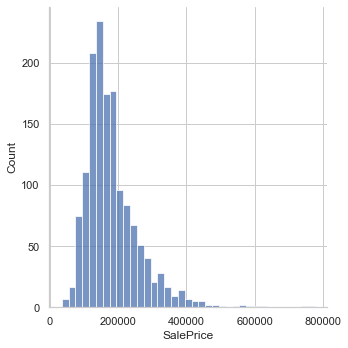

In [157]:
sns.displot(fullDf, x="SalePrice", binwidth=20000)

#### 1.3.2 Room Number, Lot and Living Areas, Floor Areas

In [80]:
fullDf['GrLivArea'].describe()

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64

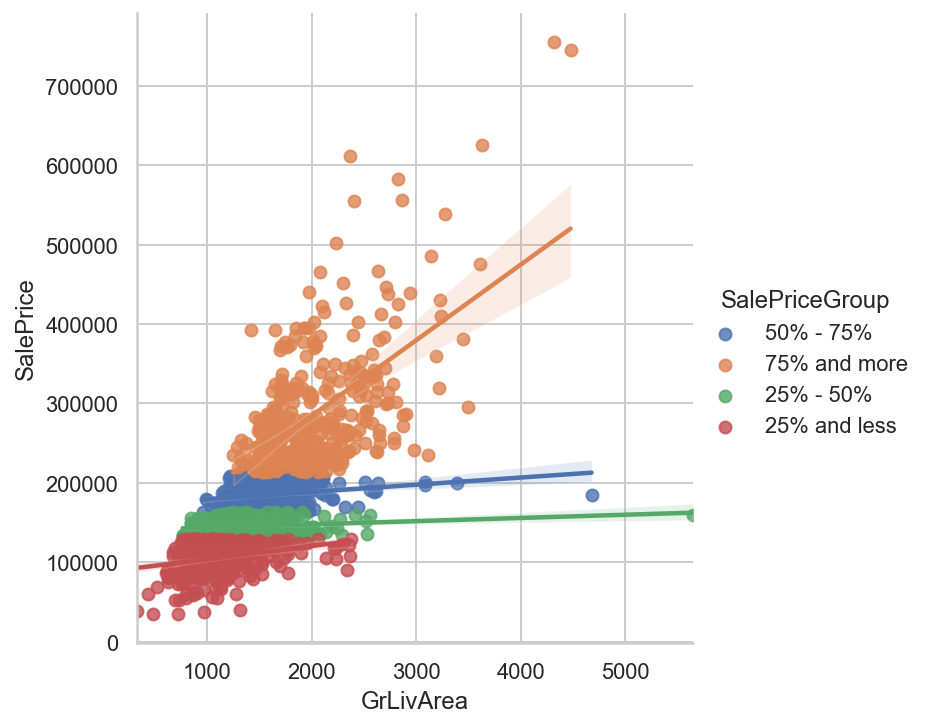

In [227]:
# Living Area impacts SalePrice

sns.lmplot(data=fullDf, x="GrLivArea", y="SalePrice", hue="SalePriceGroup")

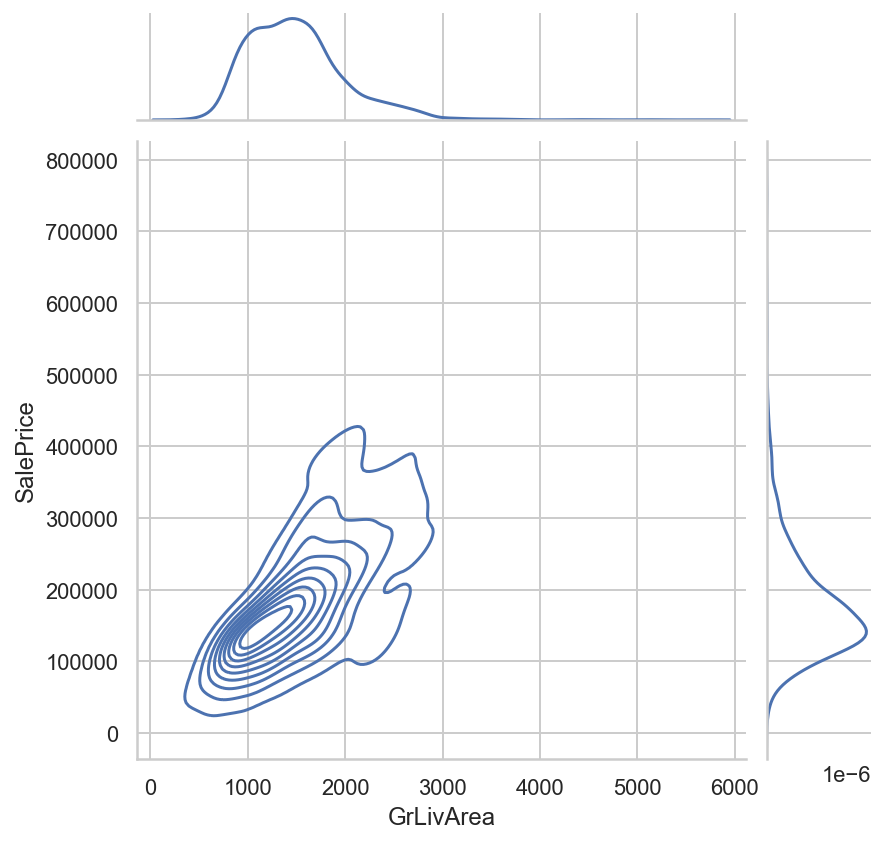

In [182]:
sns.jointplot(
    data=fullDf,
    x="GrLivArea", y="SalePrice",
    kind="kde",
)

In [141]:
def imputeLivAreaSqFtPrice(saleInfo):
    totalLivingArea = saleInfo[0]
    salePrice = saleInfo[1]

    return salePrice / totalLivingArea

fullDf['LivAreaSqFtPrice'] = fullDf[['GrLivArea', 'SalePrice']].apply(imputeLivAreaSqFtPrice, axis=1)

<AxesSubplot:xlabel='MoSold,YrSold'>

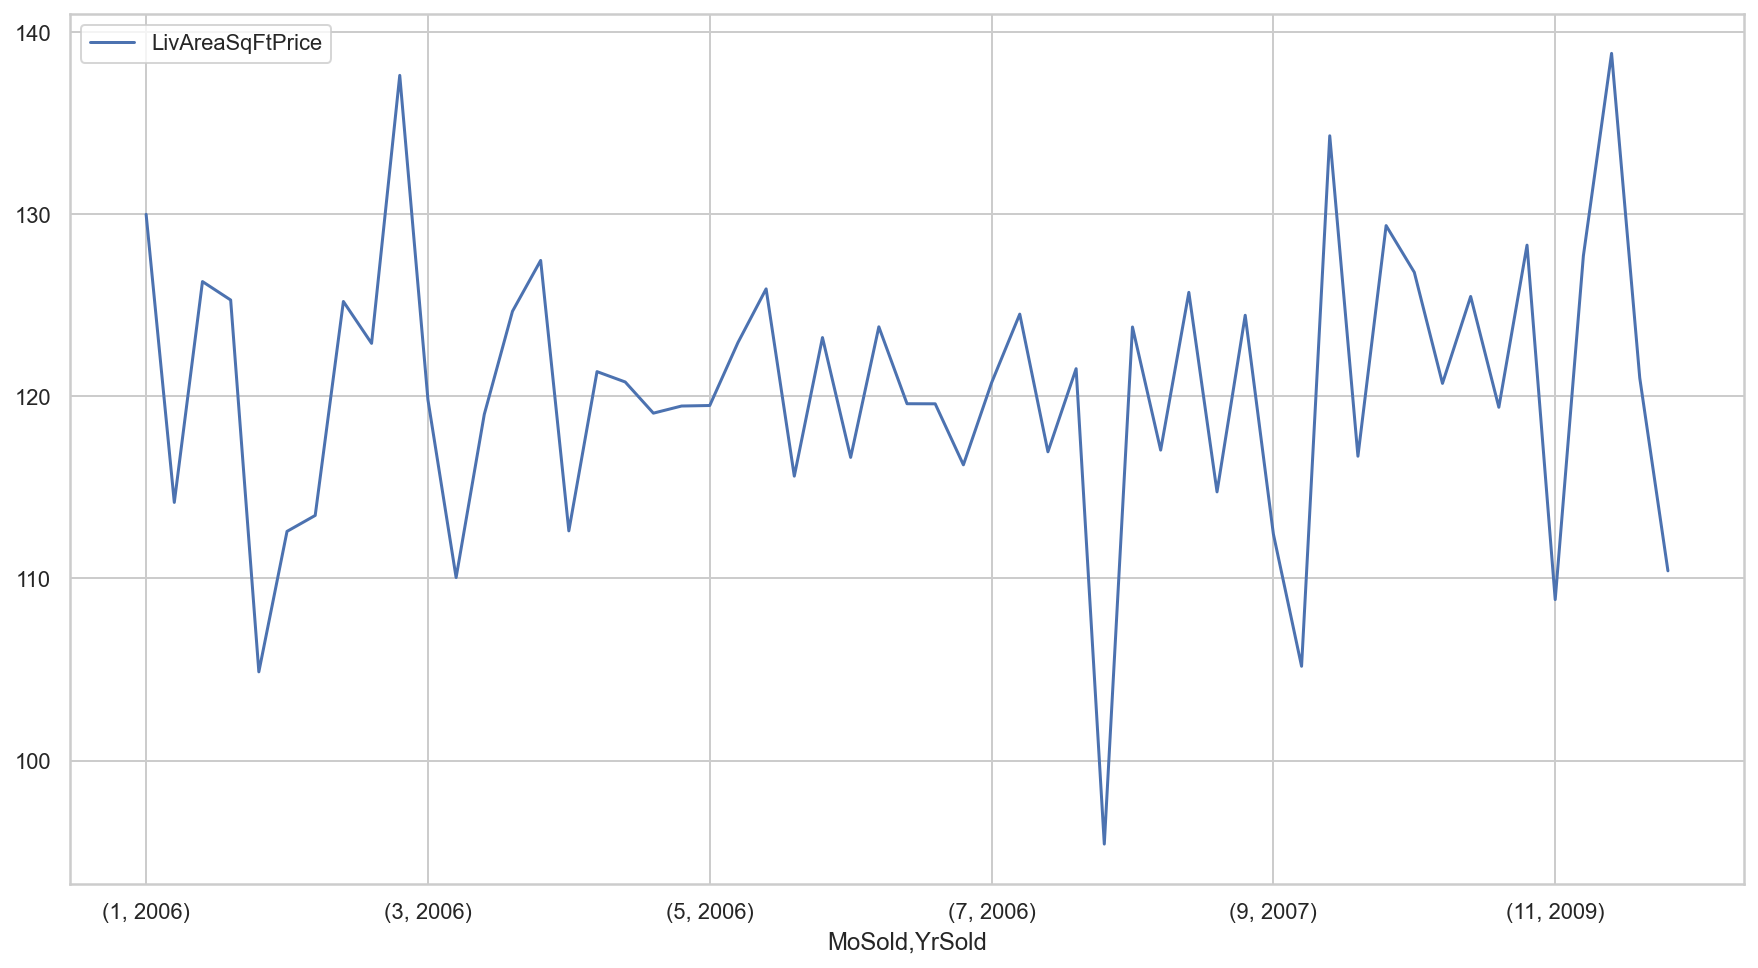

In [183]:
# Sale price of one sq. ft of living area during the time

fullDf.groupby(['MoSold', 'YrSold'])[['LivAreaSqFtPrice']].mean().plot(figsize=(15, 8))

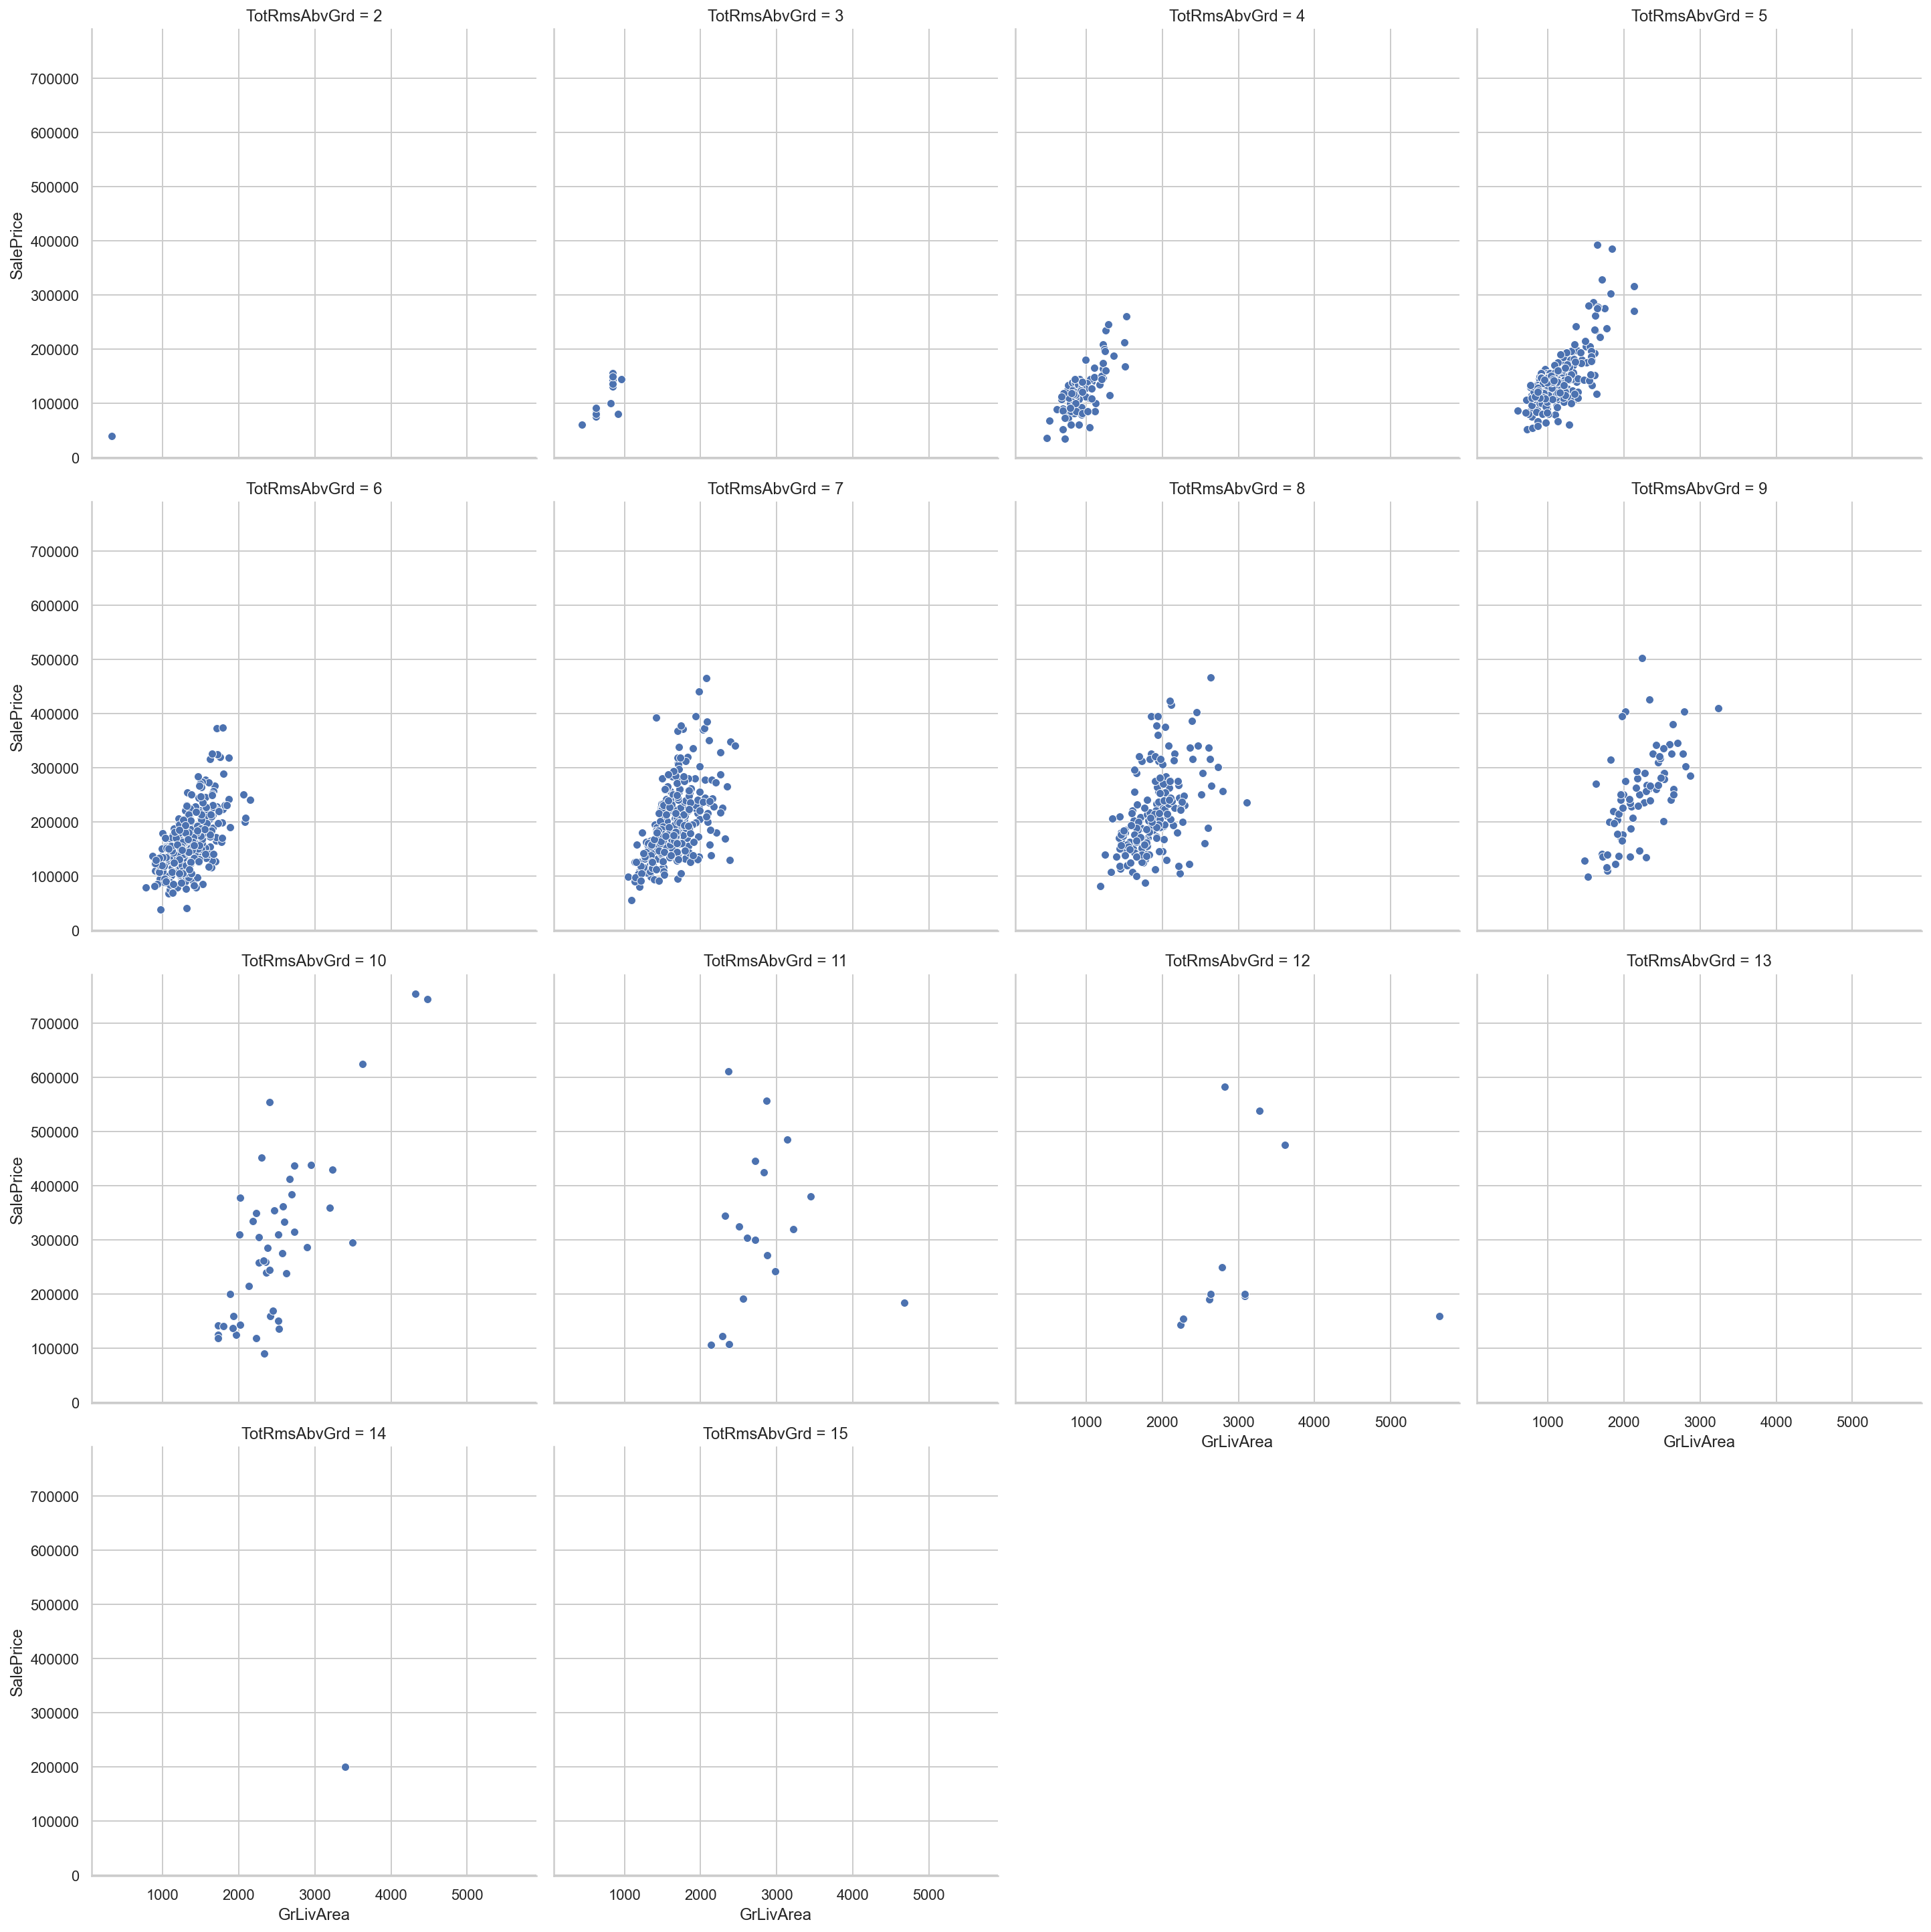

In [211]:
# Total Room Number seems to correlate with SalePrice. Concreatly, below-4-room lots estimated in less than the mean price. Between 4 and 12 rooms, the sale price of the houses started to go up slightly.

# There is 14-room outliner with the price that is around the mean. This seems to be true.

sns.relplot(x="GrLivArea", y="SalePrice", col="TotRmsAbvGrd", col_wrap=4, data=fullDf)

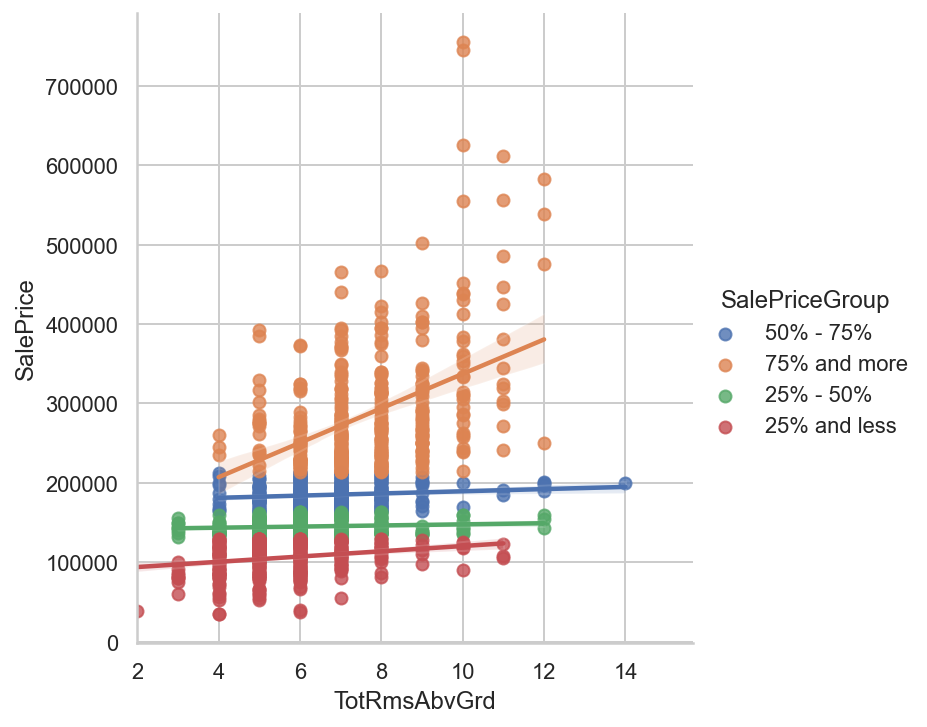

In [226]:
sns.lmplot(data=fullDf, x="TotRmsAbvGrd", y="SalePrice", hue="SalePriceGroup")

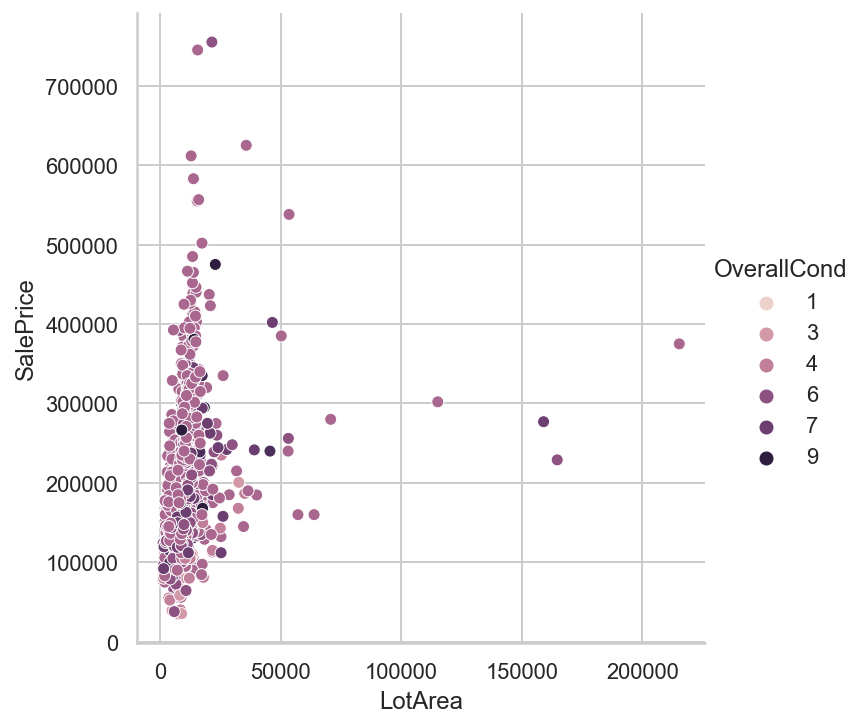

In [216]:
# Most of the house areas are less than 50000 ft^2. So LotArea does not really differentiate the dataset. Probably, a lot of houses have kind of standard area (?)

# We can see a few outliers with area more than 150k
# Could LotArea be useful somehow?

sns.relplot(x="LotArea", y="SalePrice", hue="OverallCond", data=fullDf)

In [222]:
fullDf['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

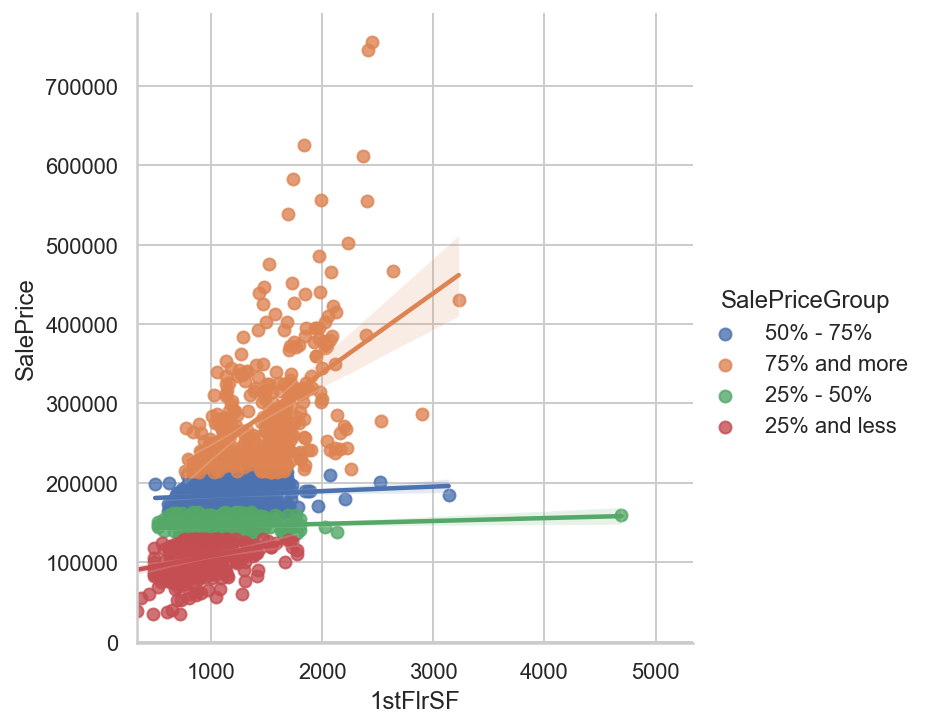

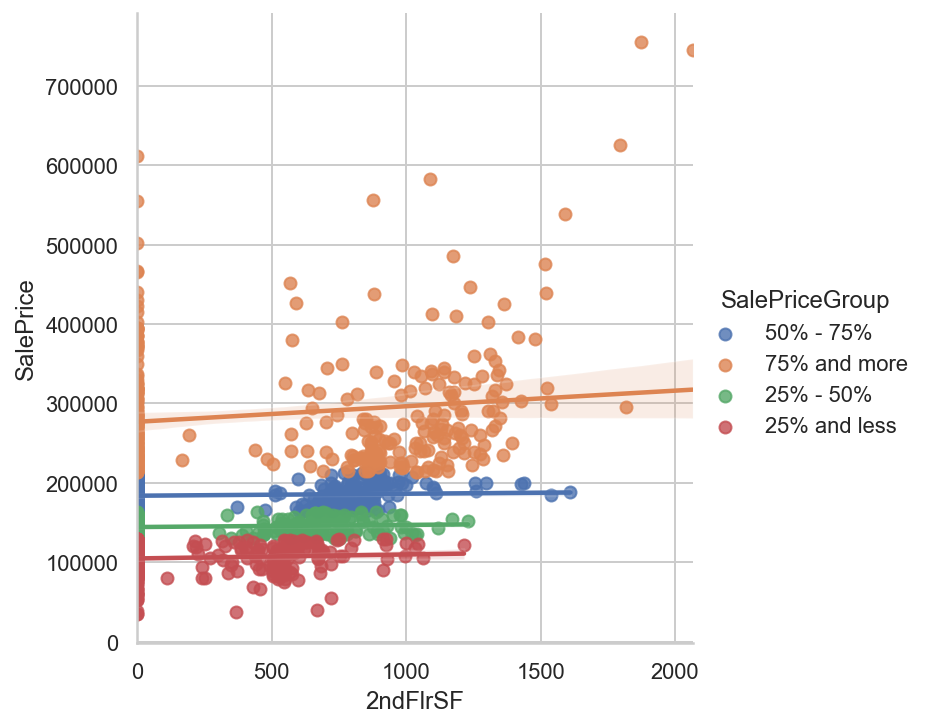

In [231]:
# ?
sns.lmplot(data=fullDf, x="1stFlrSF", y="SalePrice", hue="SalePriceGroup")
sns.lmplot(data=fullDf, x="2ndFlrSF", y="SalePrice", hue="SalePriceGroup")

#### 1.3.4 House Types and Styles

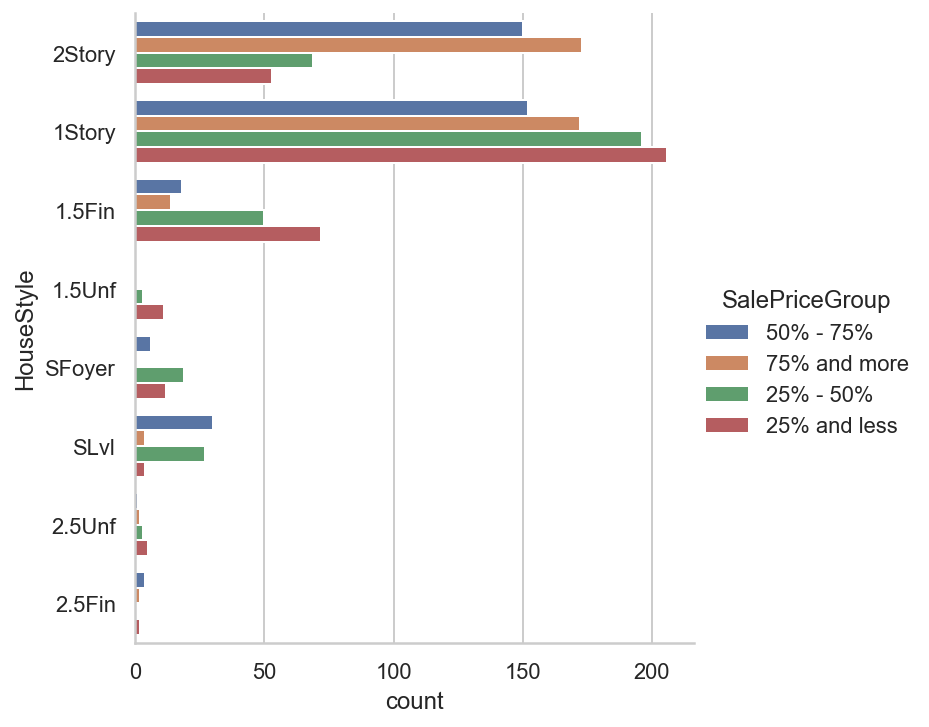

In [196]:
# House Styles correlate with sale prices
# House prices > 75% perc: 2Story, 1Story 1.5Fin
# House prices > 50% and > 75% perc: 2Story, 1Story, SLvl, 2.5Fin
# House prices < 25% and > 50% perc: 1Story, 2Story, 1.5Fin, SLvl, 2.5Unf, 1.5Unf
# House prices < 25% perc: 1.5Fin, 1.5Unf, 2.5Unf

sns.catplot(y="HouseStyle", hue="SalePriceGroup", kind="count", data=fullDf)

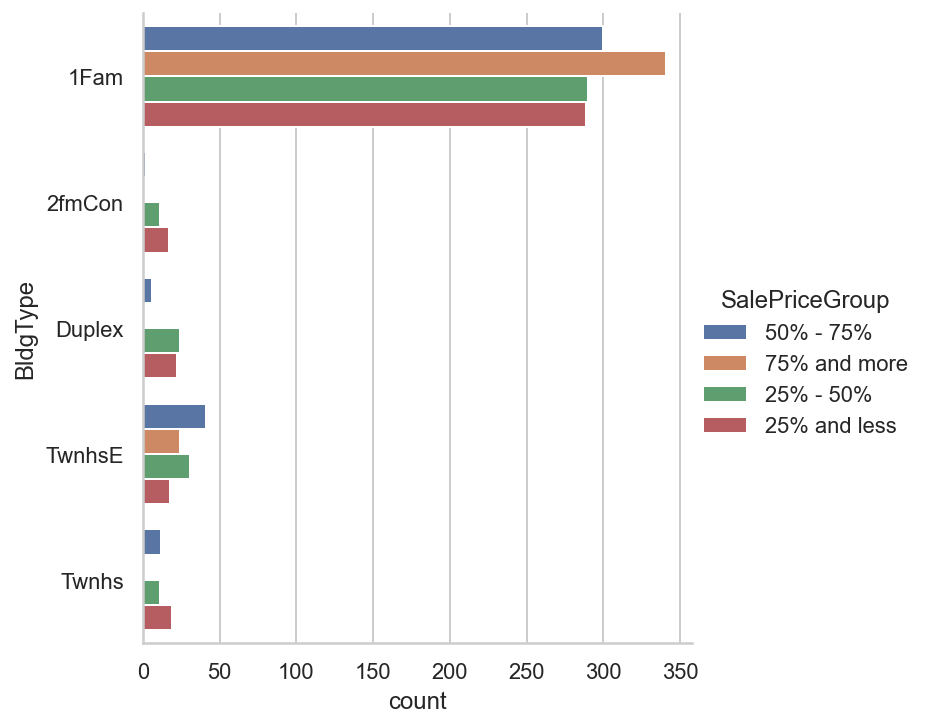

In [185]:
# Dwelling Type correlates house sale price
## House prices > 75% perc: 1Fam, TwnhsE
## House prices > 50% and < 75% perc: 1Fam, TwnhsE, TwnhsI
## House prices > 25% and < 50% perc: 1Fam, 2FamCon, TwnhsE, TwnhsI, Duplex
## House prices < 25% perc: 1Fam, 2fmCon, TwnhsE, TwnhsI, Duplex

sns.catplot(y="BldgType", hue="SalePriceGroup", kind="count", data=fullDf)

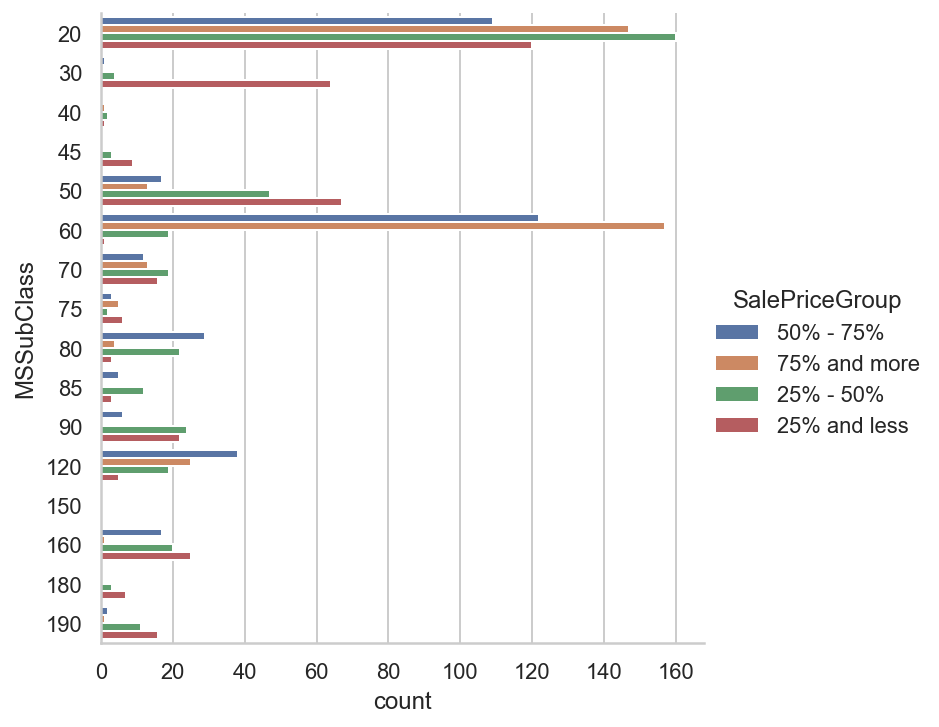

In [186]:
# MSSubClass type of dwelling is a helpful differentiator of the sale price
## House prices > 75% perc: 20, 60, 70, 75, 80, 120 (1 and 2 story of 1946 and newer)
## House prices > 50% and < 75% perc: 20, 60, 80, 120, 160 (diff styles of newer types)
## House prices > 25% and < 50% perc: 20, 30, 40, 45, 50, 60, 70, 80, 85, 90, 120, 160, 190
## House prices < 25% perc: 20, 30, 45, 50, 70, 75, 90, 120, 160, 190 (Older and unfinished styles)

sns.catplot(y="MSSubClass", hue="SalePriceGroup", kind="count", data=fullDf)

LotShape and LotConfig

<AxesSubplot:xlabel='count', ylabel='LotConfig'>

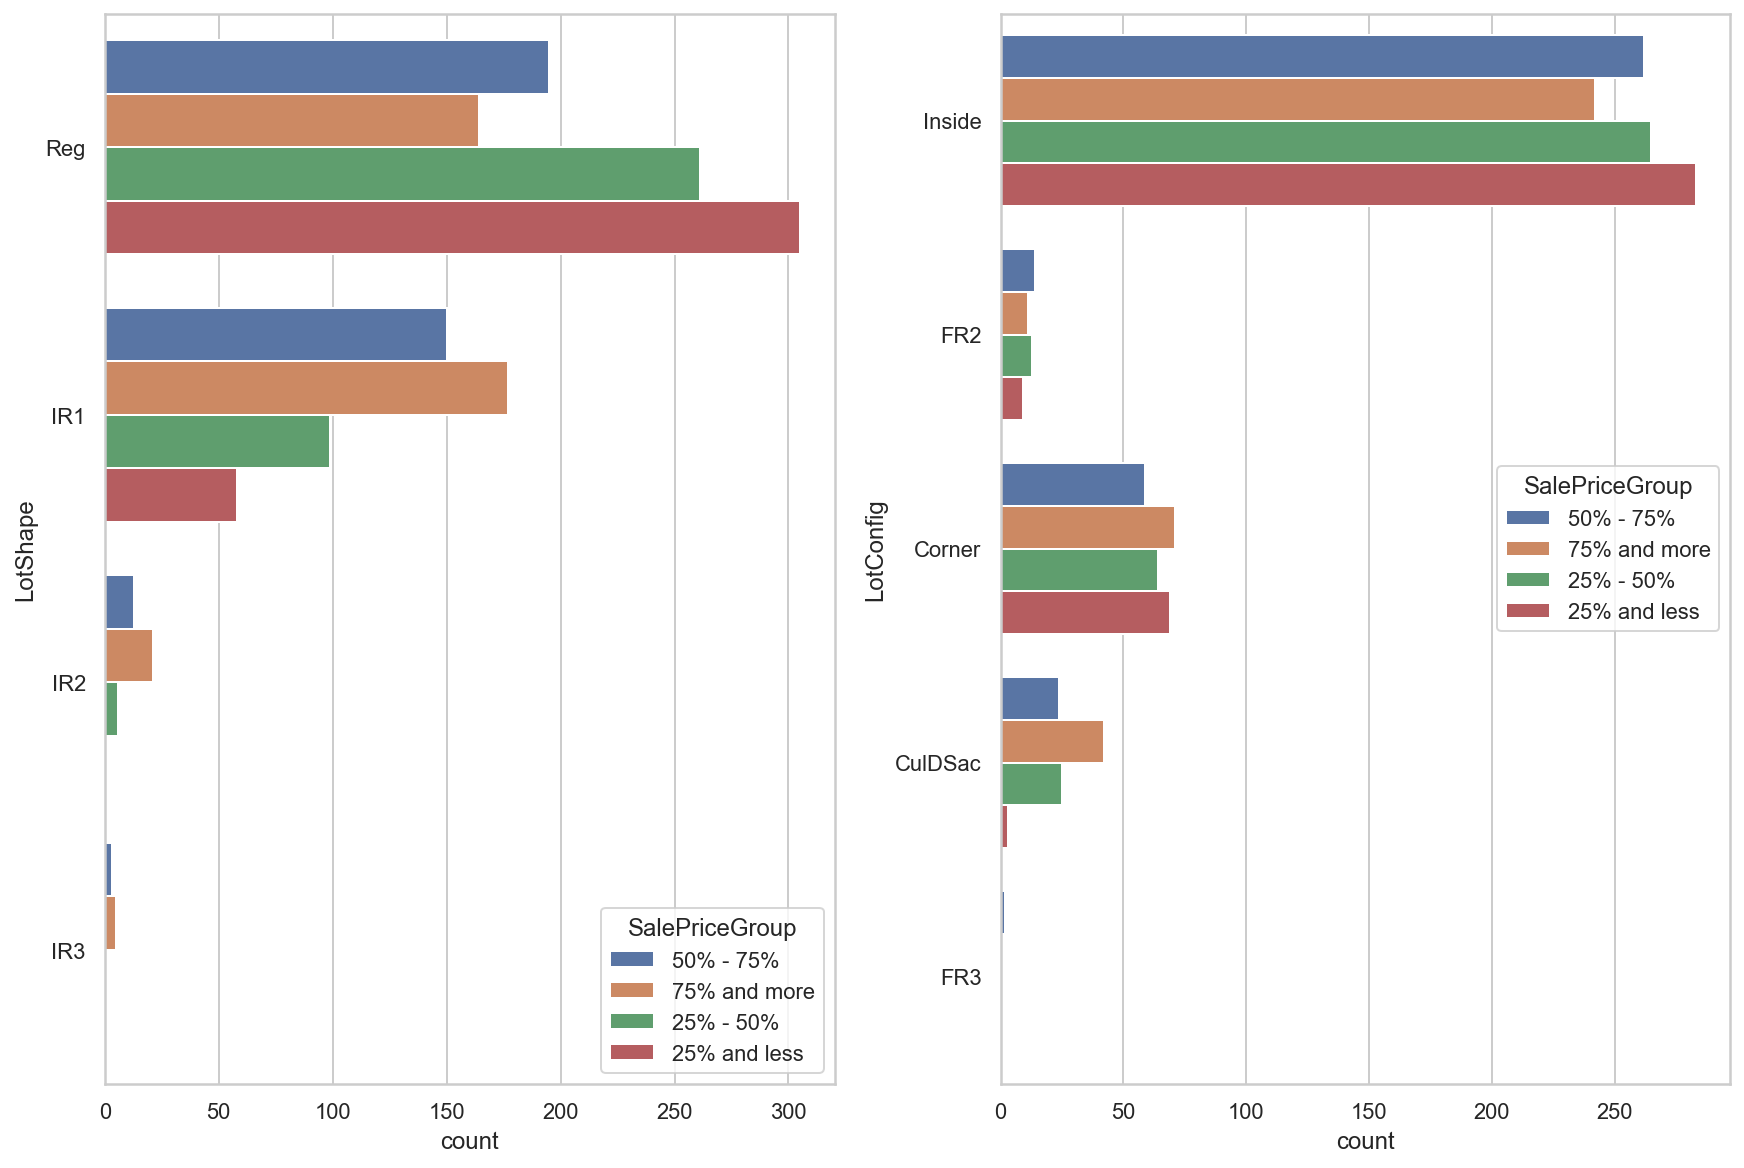

In [187]:
# Houses with SalePrice > 75% percentile dominate amoung houses with irregular shape. 
# Most of the Houses with SalePrice < 25% have a regular shape tho.

# Lot configuration: 
## Houses with SalePrice > 75% percentile have Corner, Inside, FR2, CulDSac types
## Houses with SalePrice < 25% have mostly inside types and also Corner and FR2 types
# More info: https://www.thetruthaboutrealty.com/real-estate-lot-types/

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="LotShape", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="LotConfig", hue="SalePriceGroup", ax=ax[1])

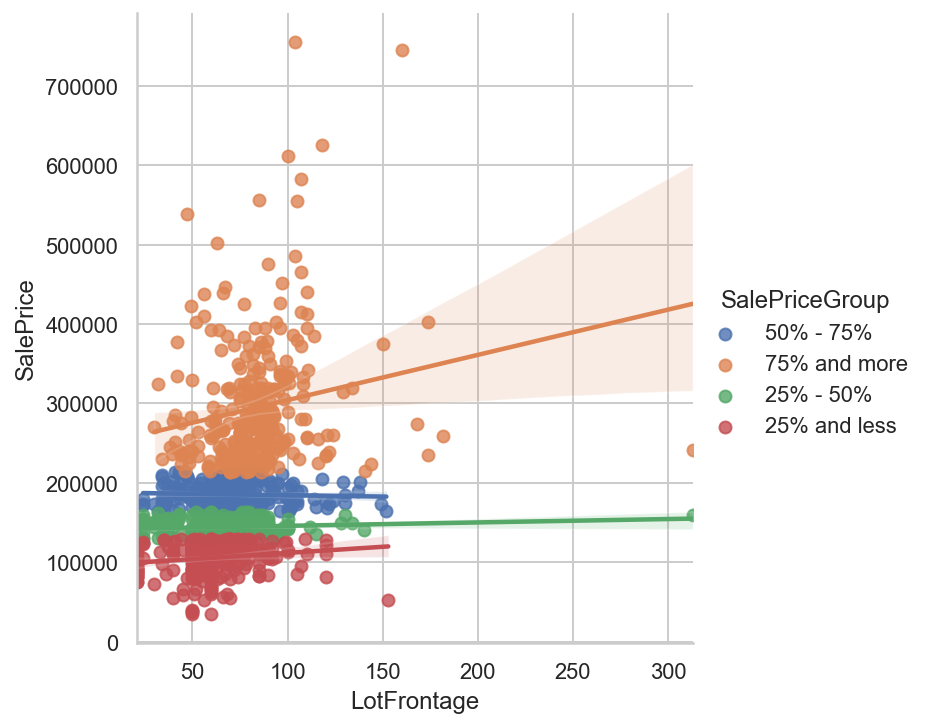

In [232]:
# ?
sns.lmplot(data=fullDf, x="LotFrontage", y="SalePrice", hue="SalePriceGroup")

LandContour and LandSlope

<AxesSubplot:xlabel='count', ylabel='LandSlope'>

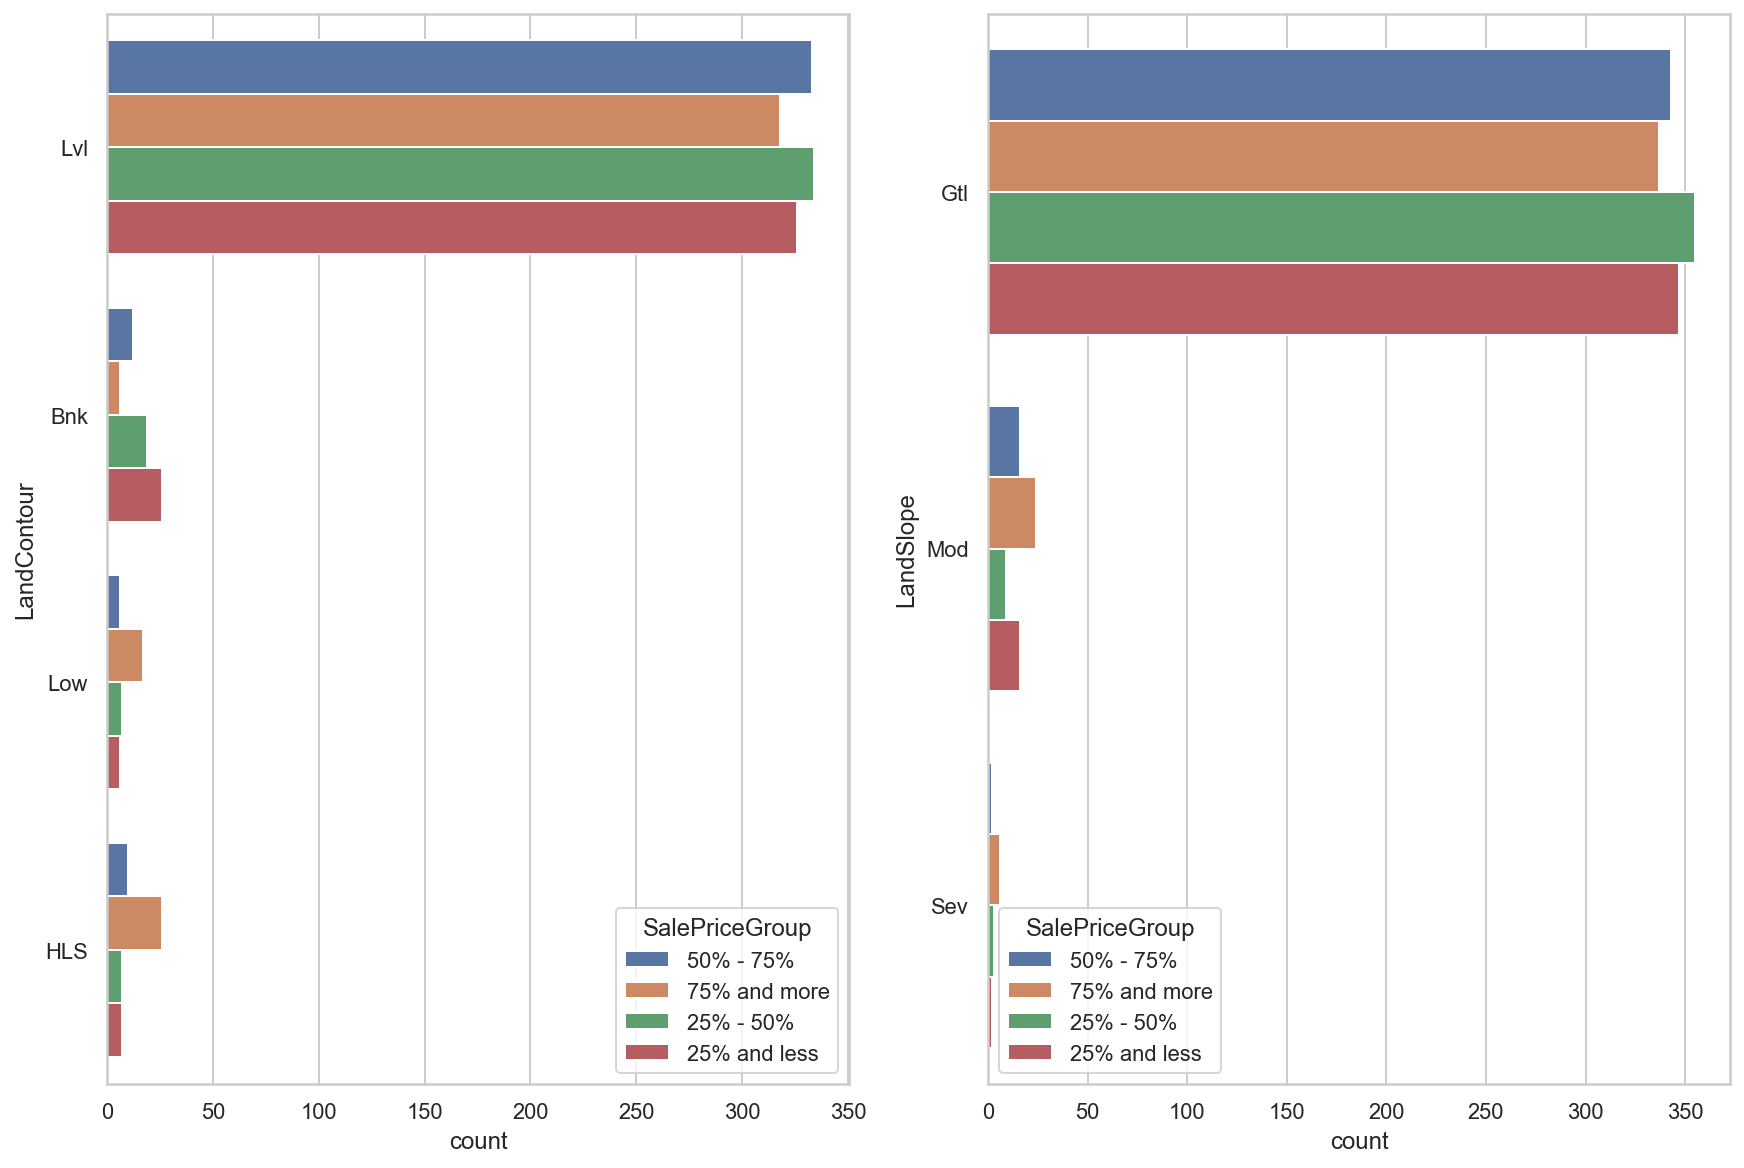

In [190]:
# Land Contour
## Low and hillside flatness as well as moderate and severe slopes dominate amoung house with SalePrice > 75% percentile. Probably, these houses have some kind of landscape design work done

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="LandContour", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="LandSlope", hue="SalePriceGroup", ax=ax[1])

House Overall Condition and Material Quality

<AxesSubplot:xlabel='count', ylabel='OverallQual'>

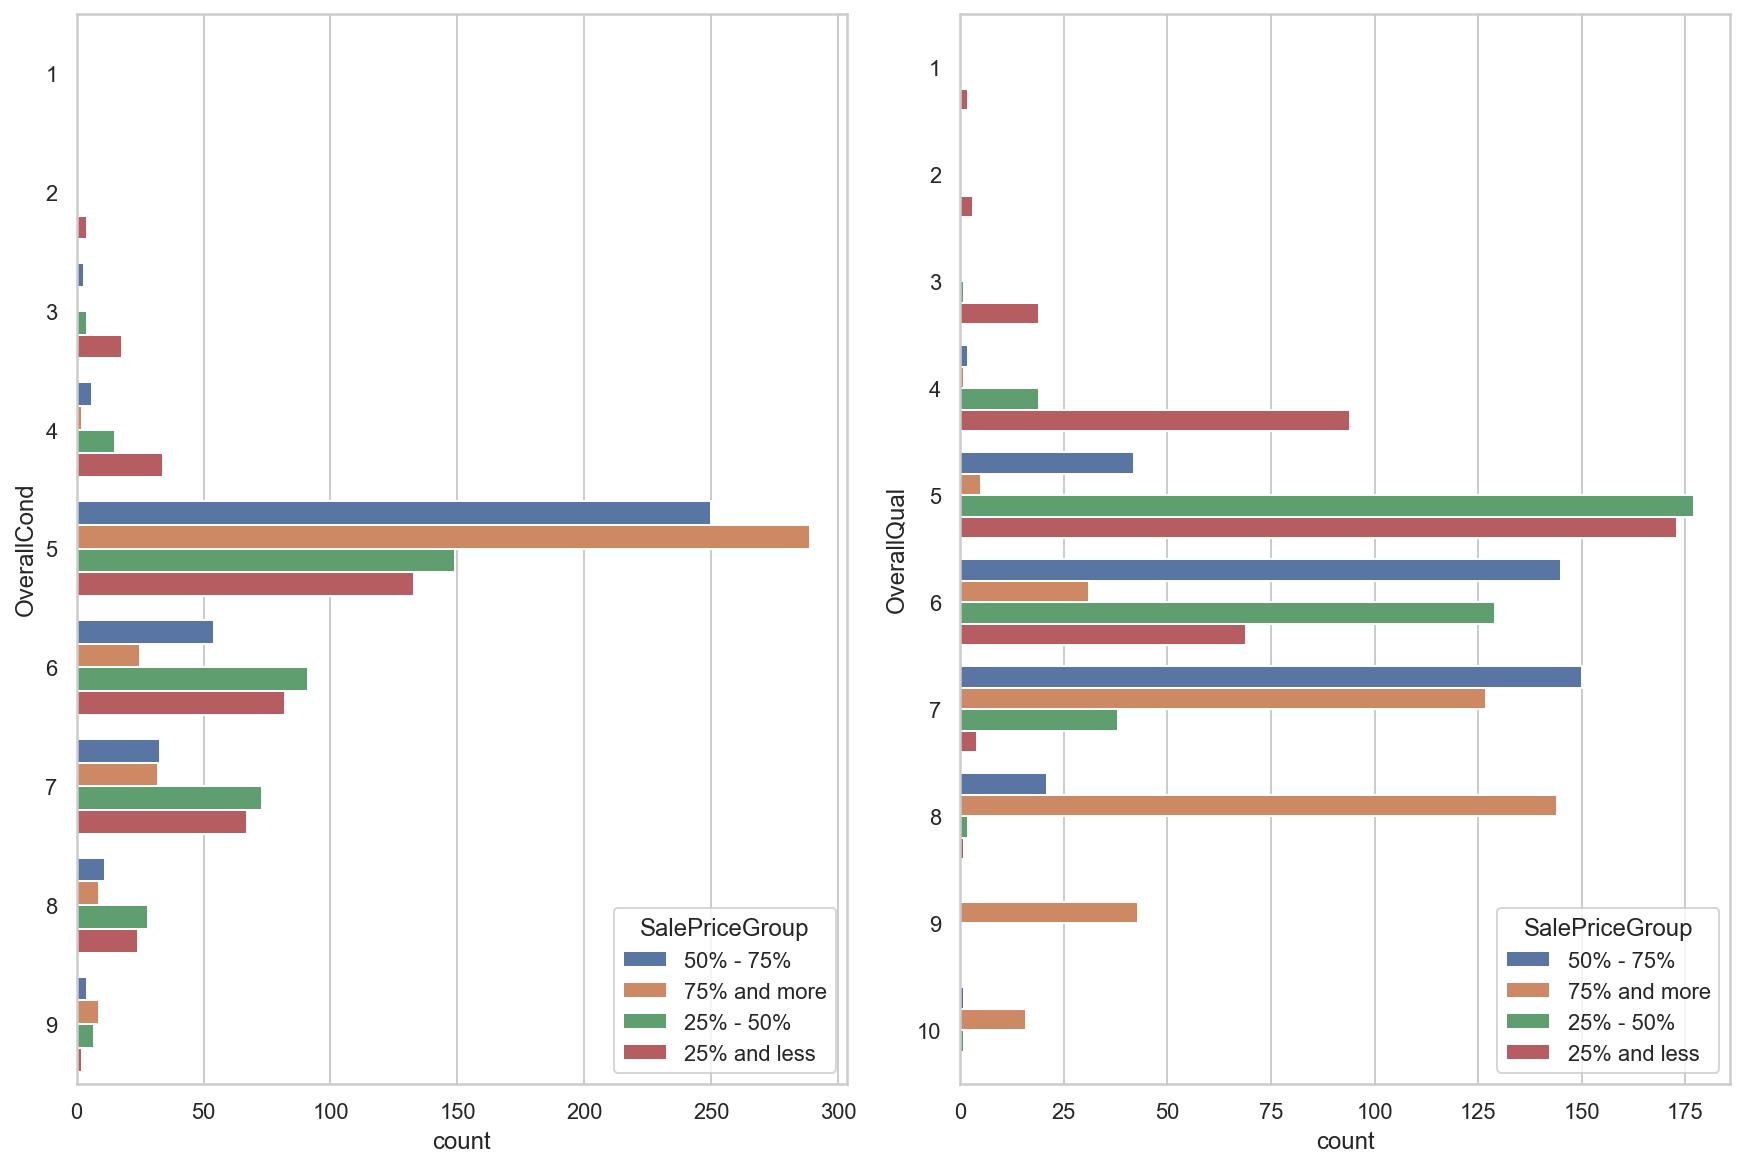

In [201]:
# Overall Condition and Material Quality storongly correlates with SalePrices.
## Houses with SalePrice > 50% percentile have avarage and higher overall condition. Lots with SalePrice < 50% percentile have a higher percentage among below avarage condition houses, but generally they are included to all condition groups.
## Overral Material Quality seems to differentiate expensive houses from cheap. Lots with SalePrice < 50% percentile dominates in avarage and below quality groups. In above avarage quality groups there are a bigger percentage of houses with SalePrice > 50% (particullary, lots with SalePrice > 75% prevail in very good and above quality groups)

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="OverallCond", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="OverallQual", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Functional'>

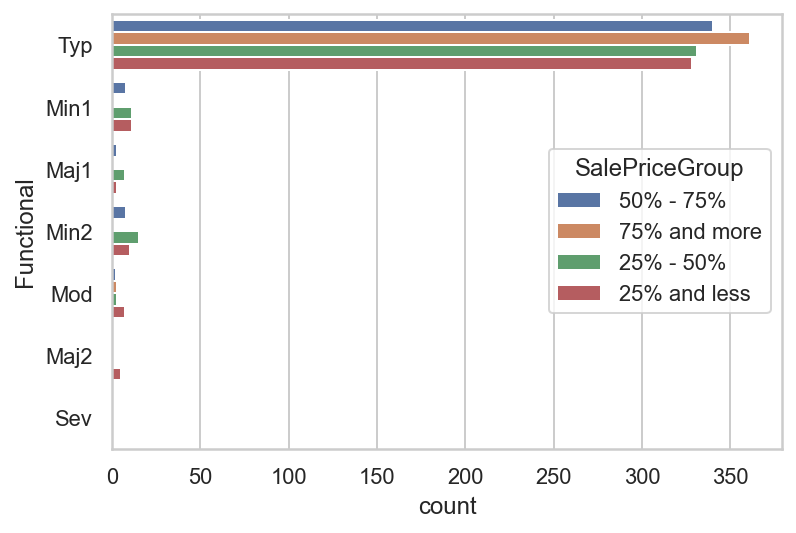

In [207]:
# Home functionality affects house sale price. 
# Samples with a functionality other than "Typical" losses sale prices drastically.

sns.countplot(data=fullDf, y="Functional", hue="SalePriceGroup")

# There is a outliner with Moderate functionality that costs more than $500k

House Access

<AxesSubplot:xlabel='count', ylabel='Street'>

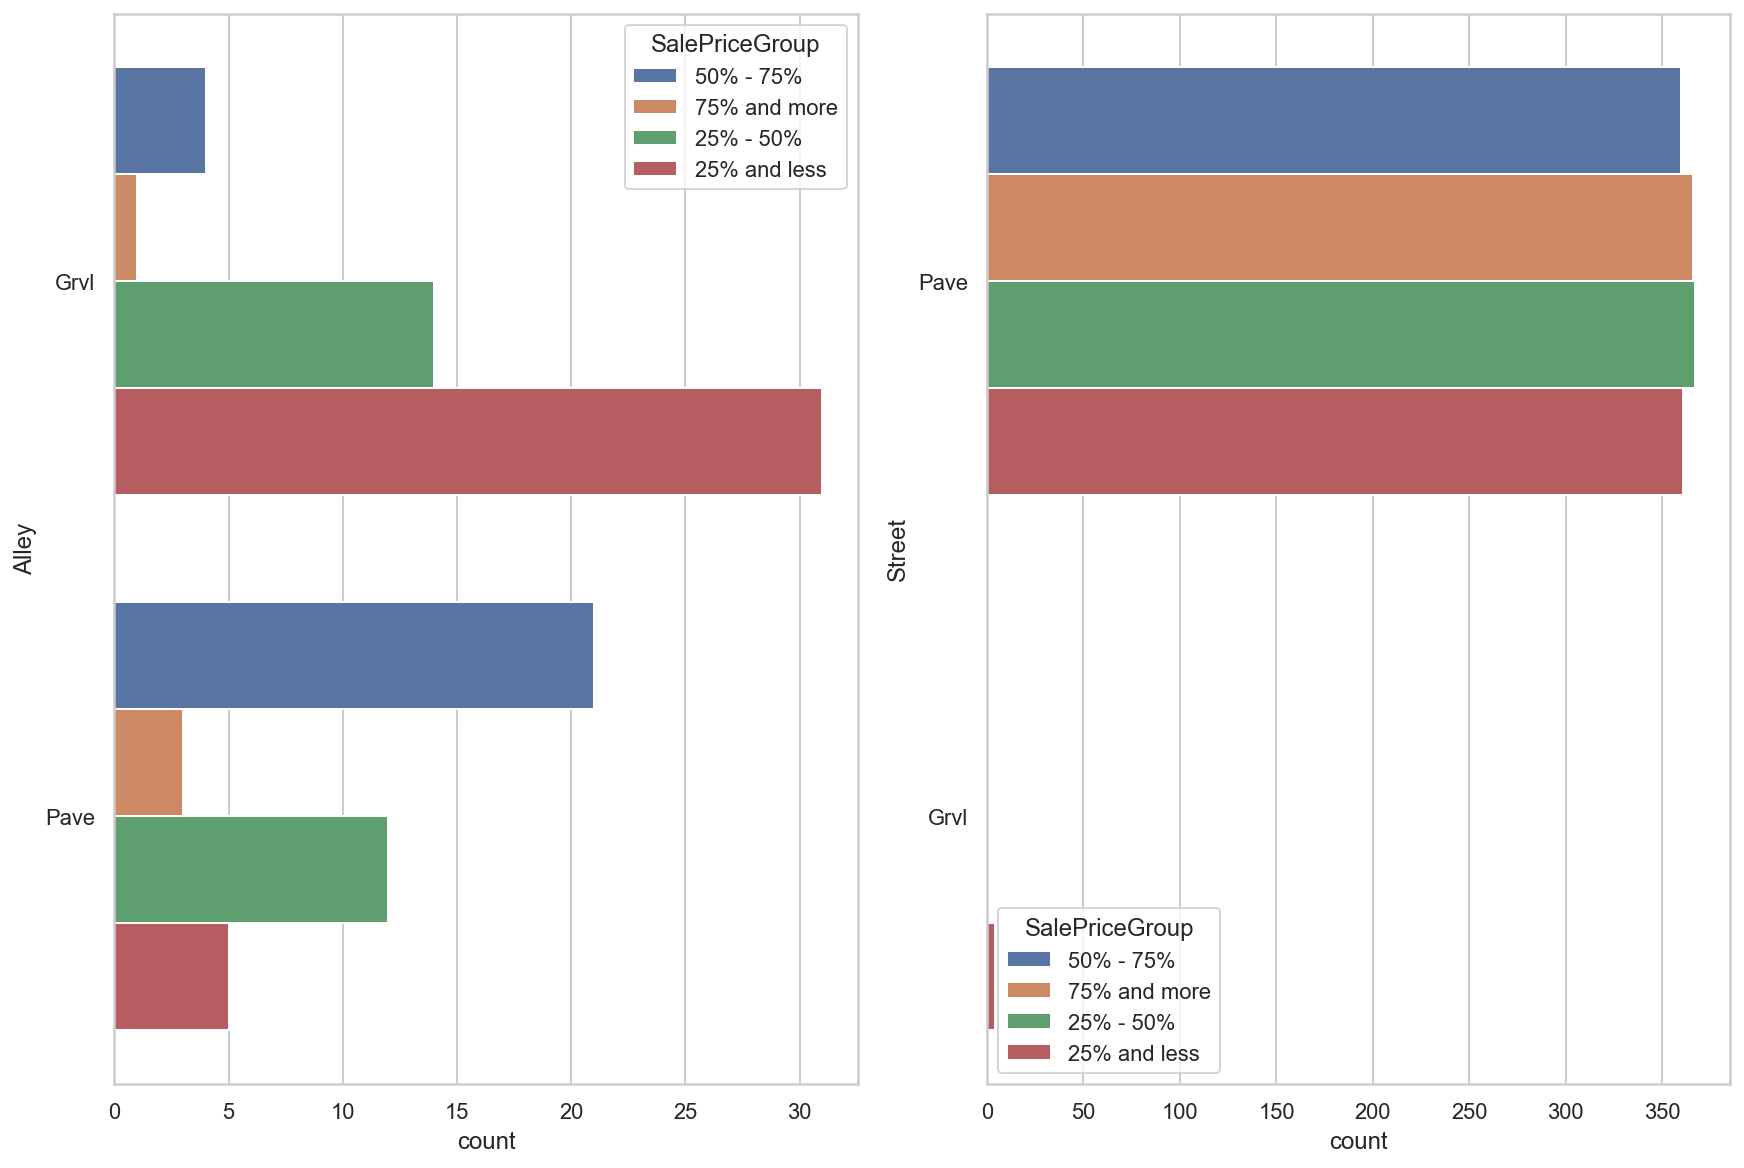

In [191]:
# Most of houses that have SalePrice < 50% connected with gravel alleys or gravel streets.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Alley", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Street", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='PavedDrive'>

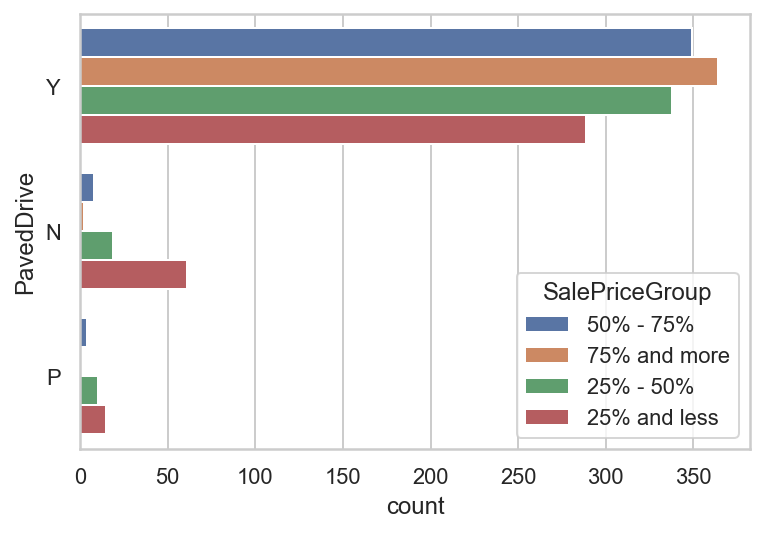

In [237]:
# Conclusions?

sns.countplot(data=fullDf, y="PavedDrive", hue="SalePriceGroup")

House Location: Neighborhood, Zoning and Additional Conditions

In [192]:
# Neighborhood and MSZoning do differentiate dataset:

# Zoning with house price above the mean: RL, FV
# Zoning with house price below the mean: RM, C, RH

# Neighborhoods with house price below the mean: IDOTRR, Swisu, DrDale, NPkVill, MeadowV, Sawyer, OldTown, Edwards, NAmes
# Neighborhoods with house price above the mean: NoRidge, Mitchel, Crawfor, SawyerW, Timber, Somerst, CollgeCr, Gilbert, NWAmes
# Neighborhoods with house price above 75% perct: NridgHt, CollgeCr, Crawfor, Timber, StoreBr

sns.relplot(x="LotArea", y="SalePrice", hue="OverallQual", col="Neighborhood", row="MSZoning", data=fullDf)

<AxesSubplot:xlabel='count', ylabel='MSZoning'>

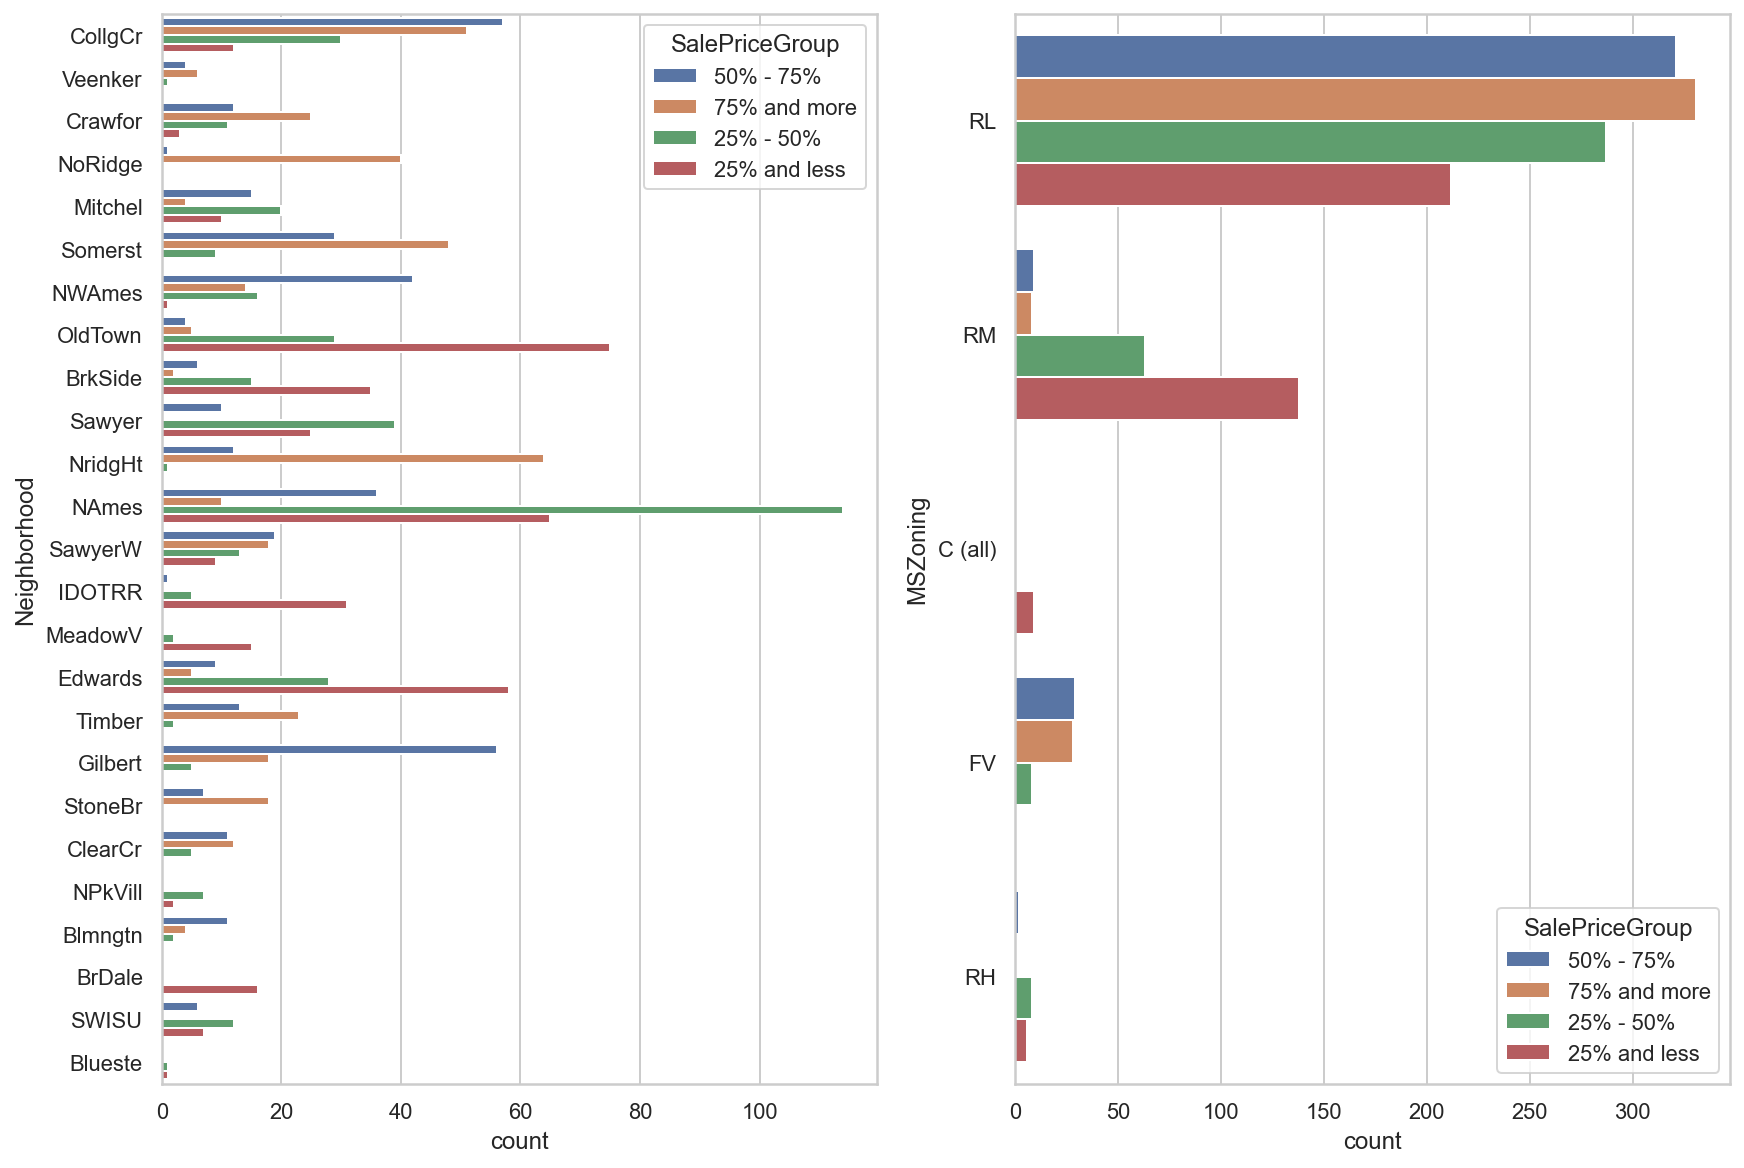

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Neighborhood", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="MSZoning", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Condition2'>

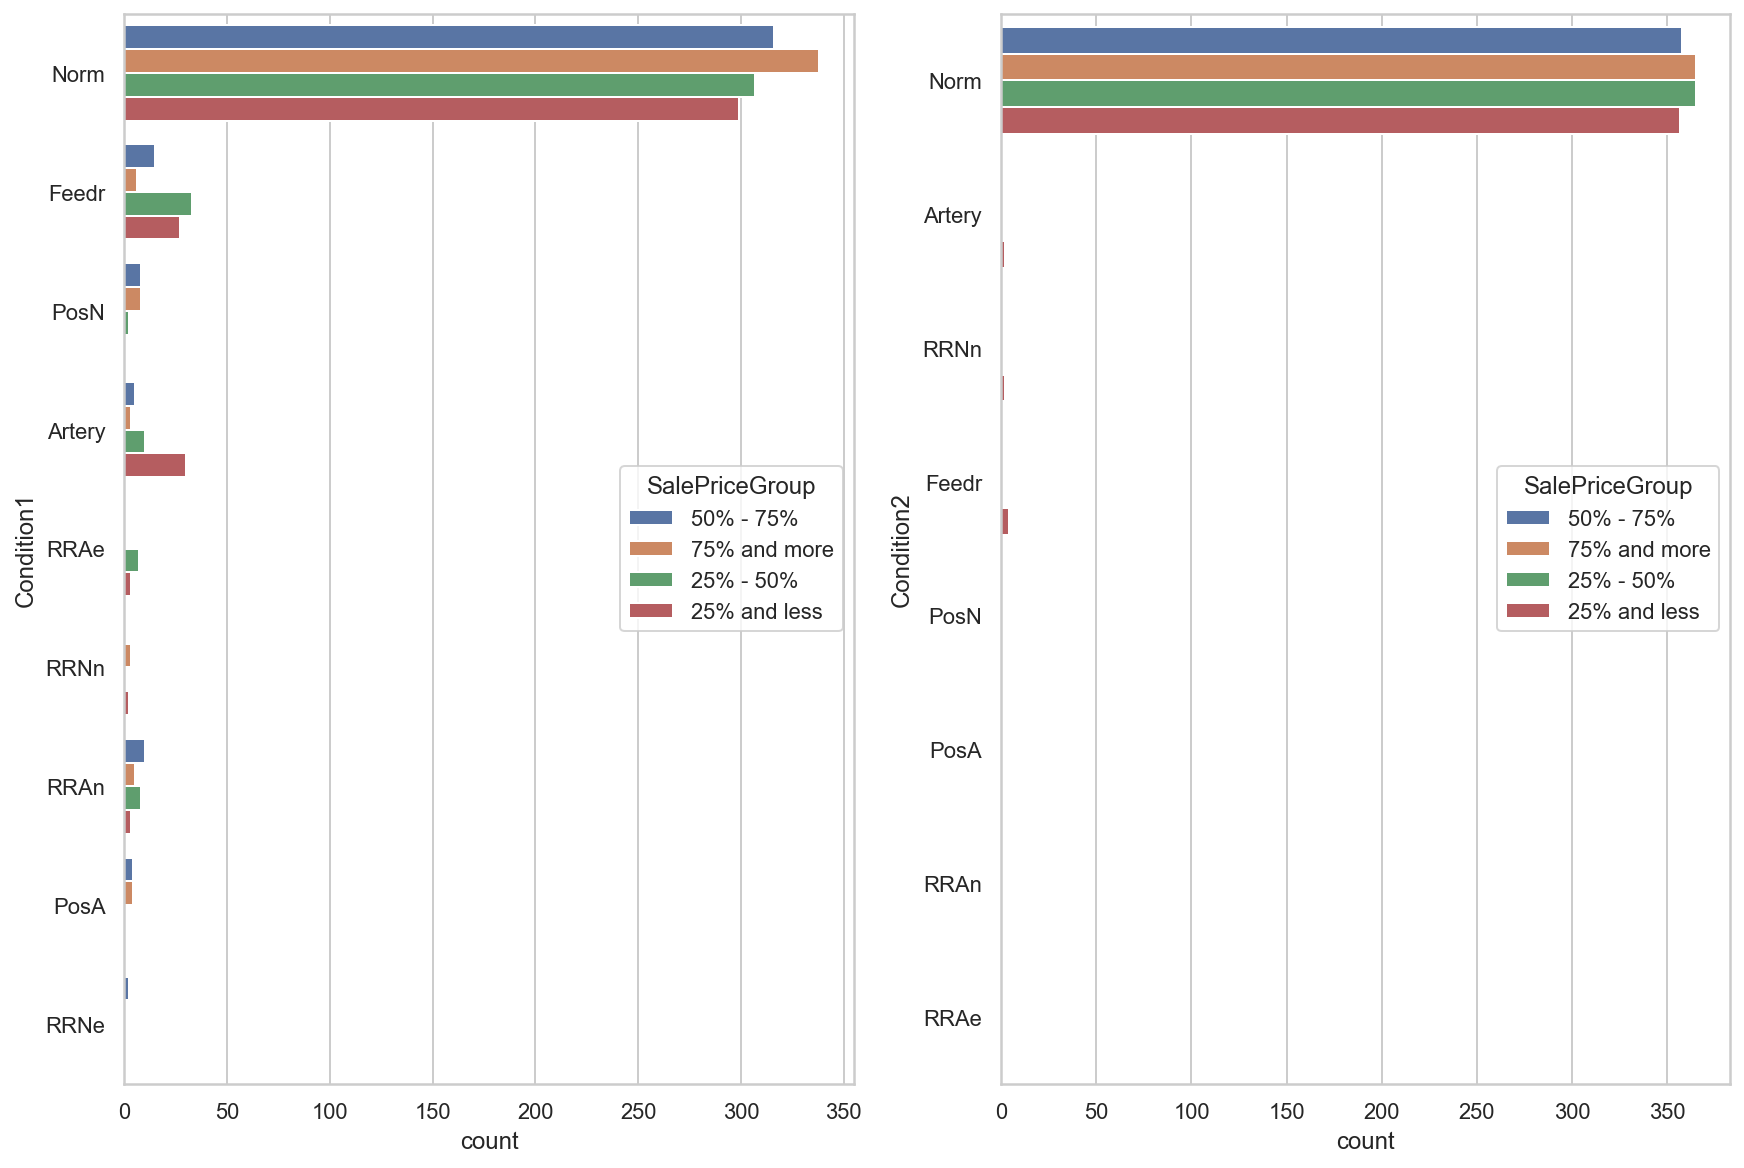

In [195]:
# ?
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Condition1", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Condition2", hue="SalePriceGroup", ax=ax[1])

#### Roof Properties

<AxesSubplot:xlabel='count', ylabel='RoofMatl'>

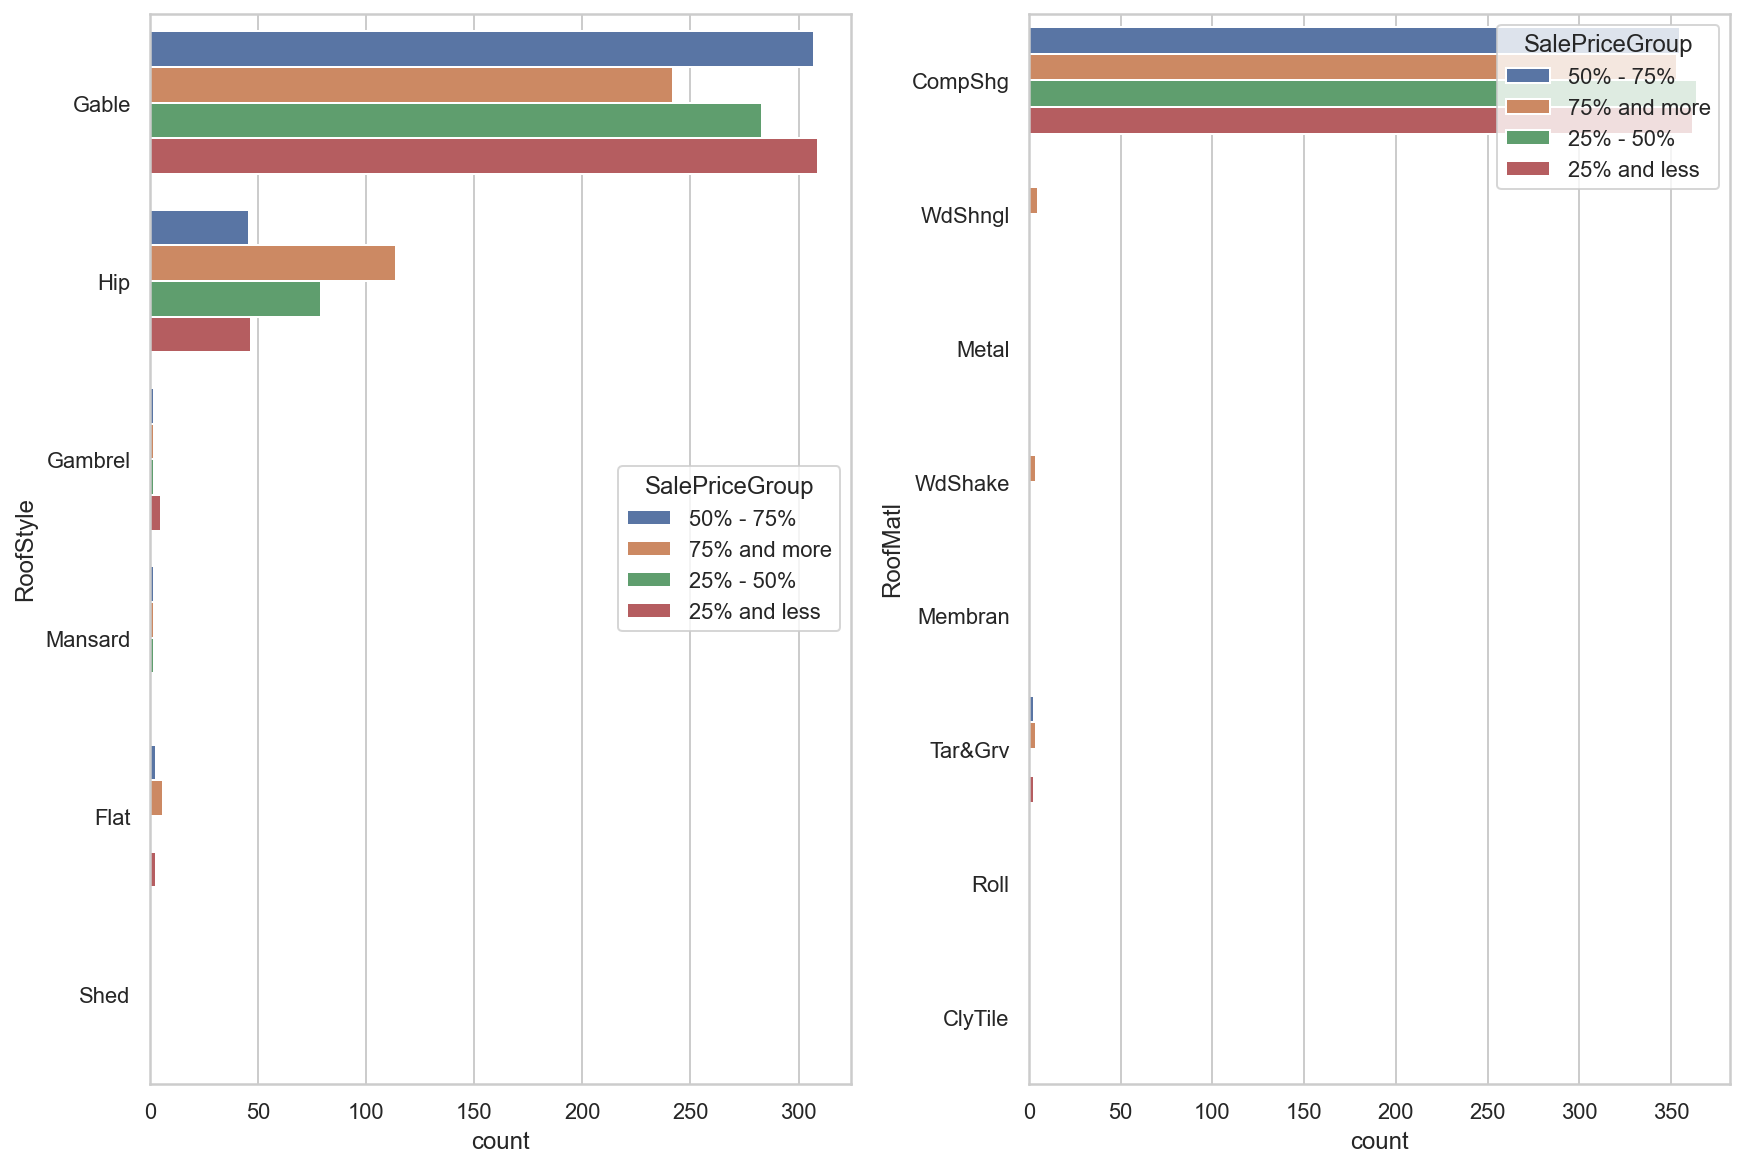

In [198]:
# ?
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="RoofStyle", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="RoofMatl", hue="SalePriceGroup", ax=ax[1])

House Exterior Properties

<AxesSubplot:xlabel='count', ylabel='Exterior2nd'>

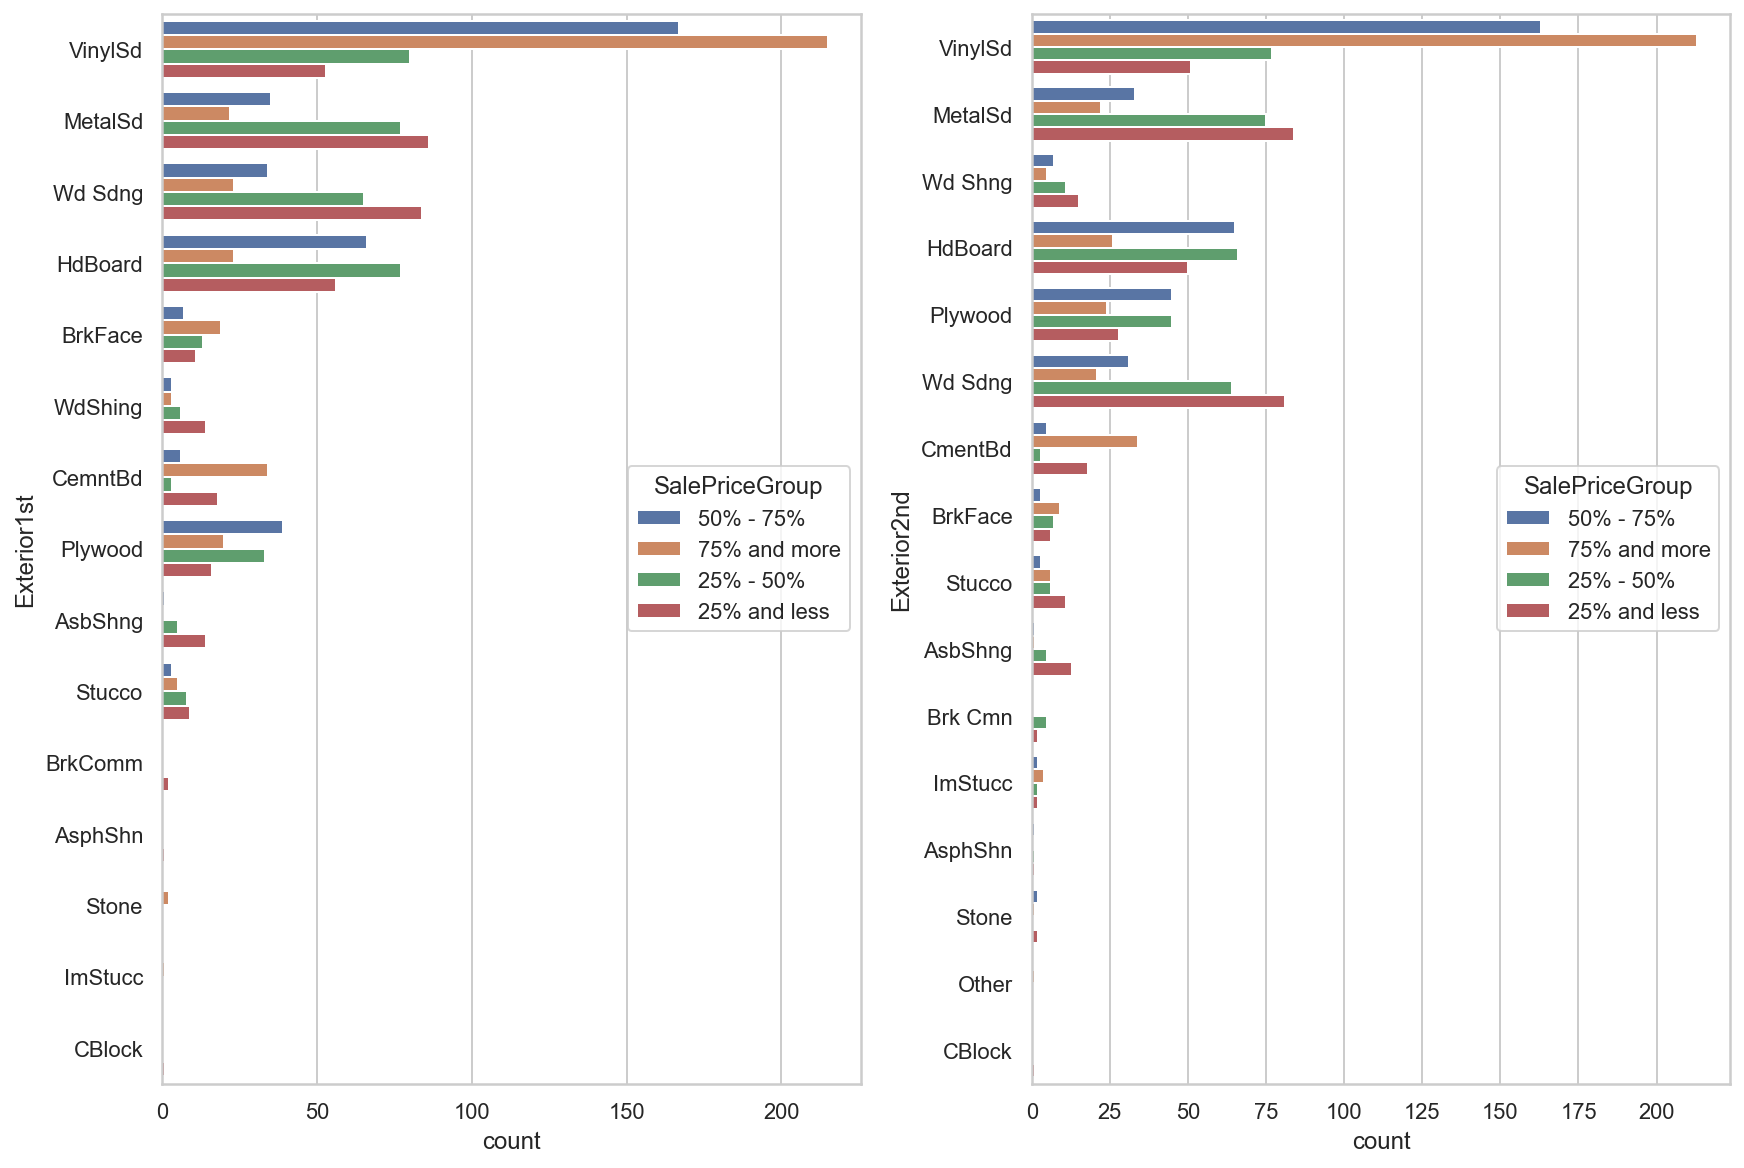

In [199]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Exterior1st", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Exterior2nd", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='ExterCond'>

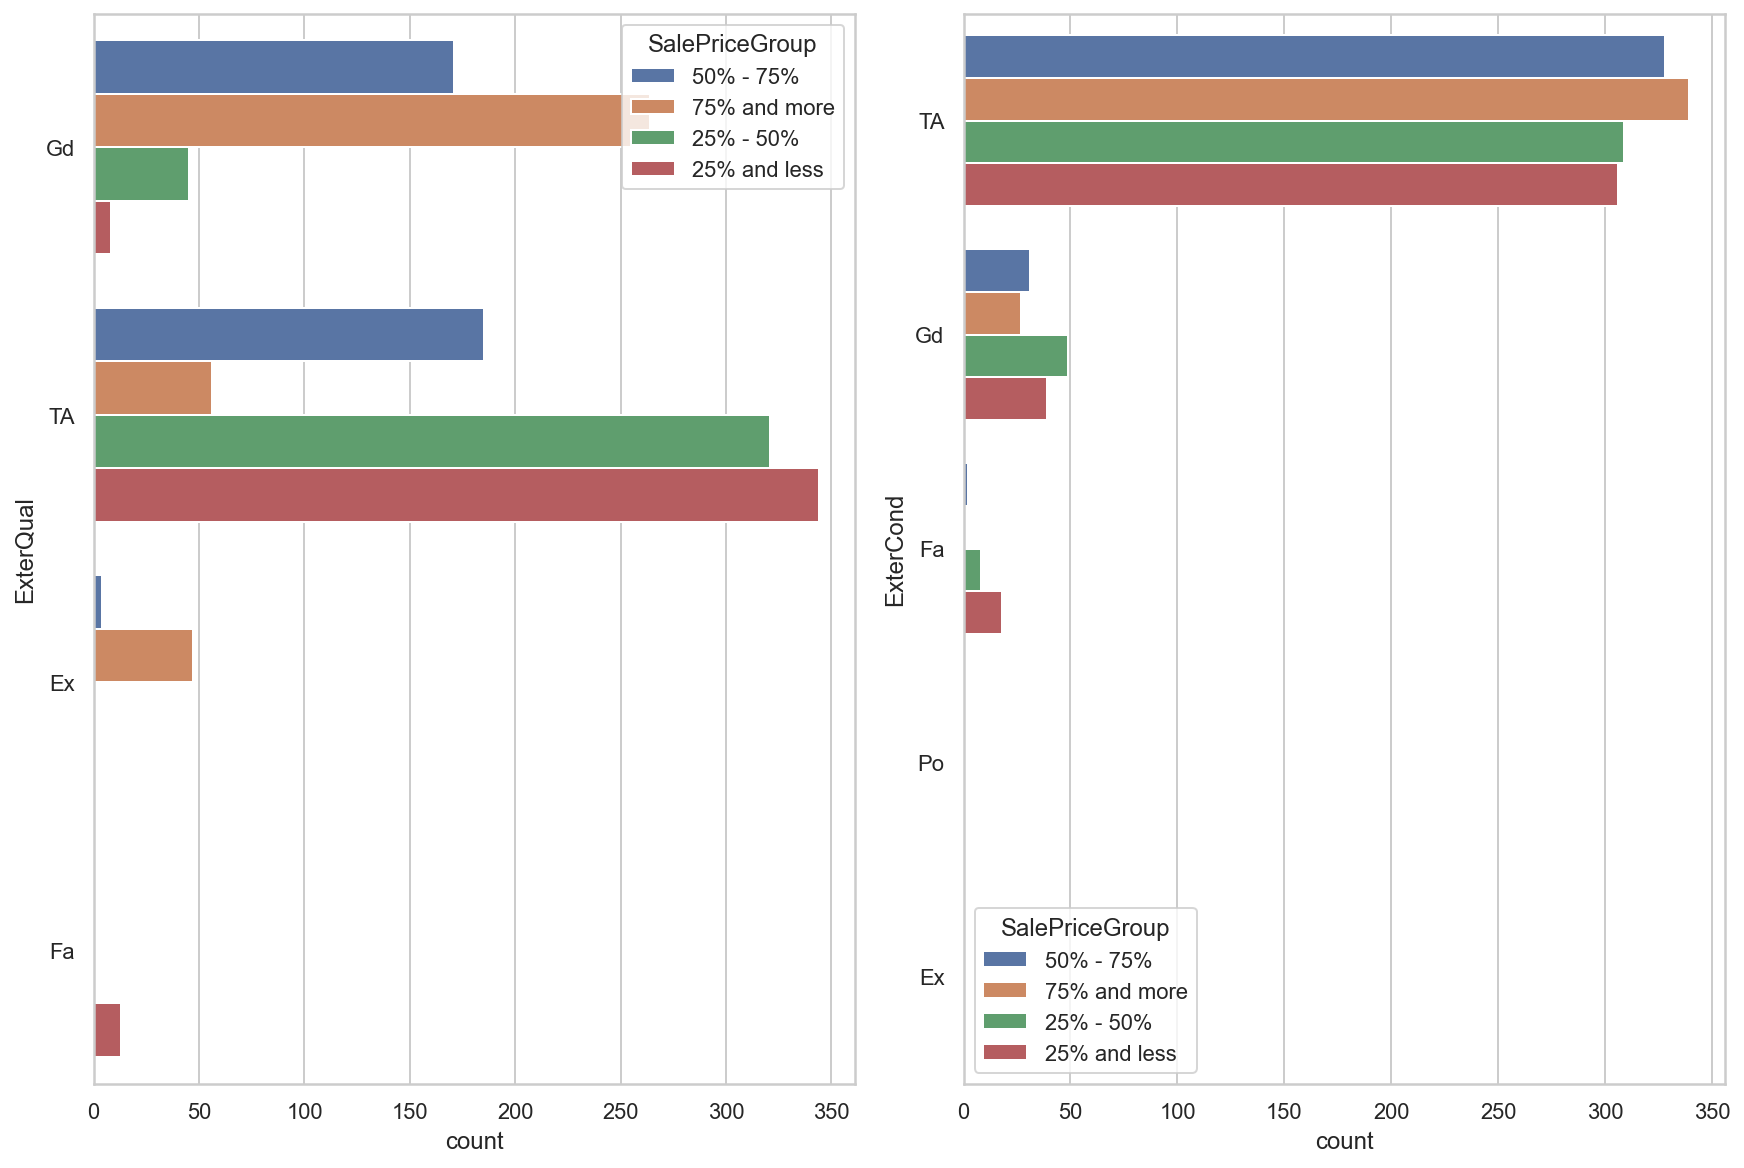

In [200]:
# Houses with SalePrice > 75% percentile have mostly good or exellent exterior quality. They also have avarage or good conditions.

## Houses with SalePrice < 50% percentile have mostly avarage quality and avarage condition.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="ExterQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="ExterCond", hue="SalePriceGroup", ax=ax[1])

Heating, Air Condition and Electrical Systems, Utilities

<AxesSubplot:xlabel='count', ylabel='HeatingQC'>

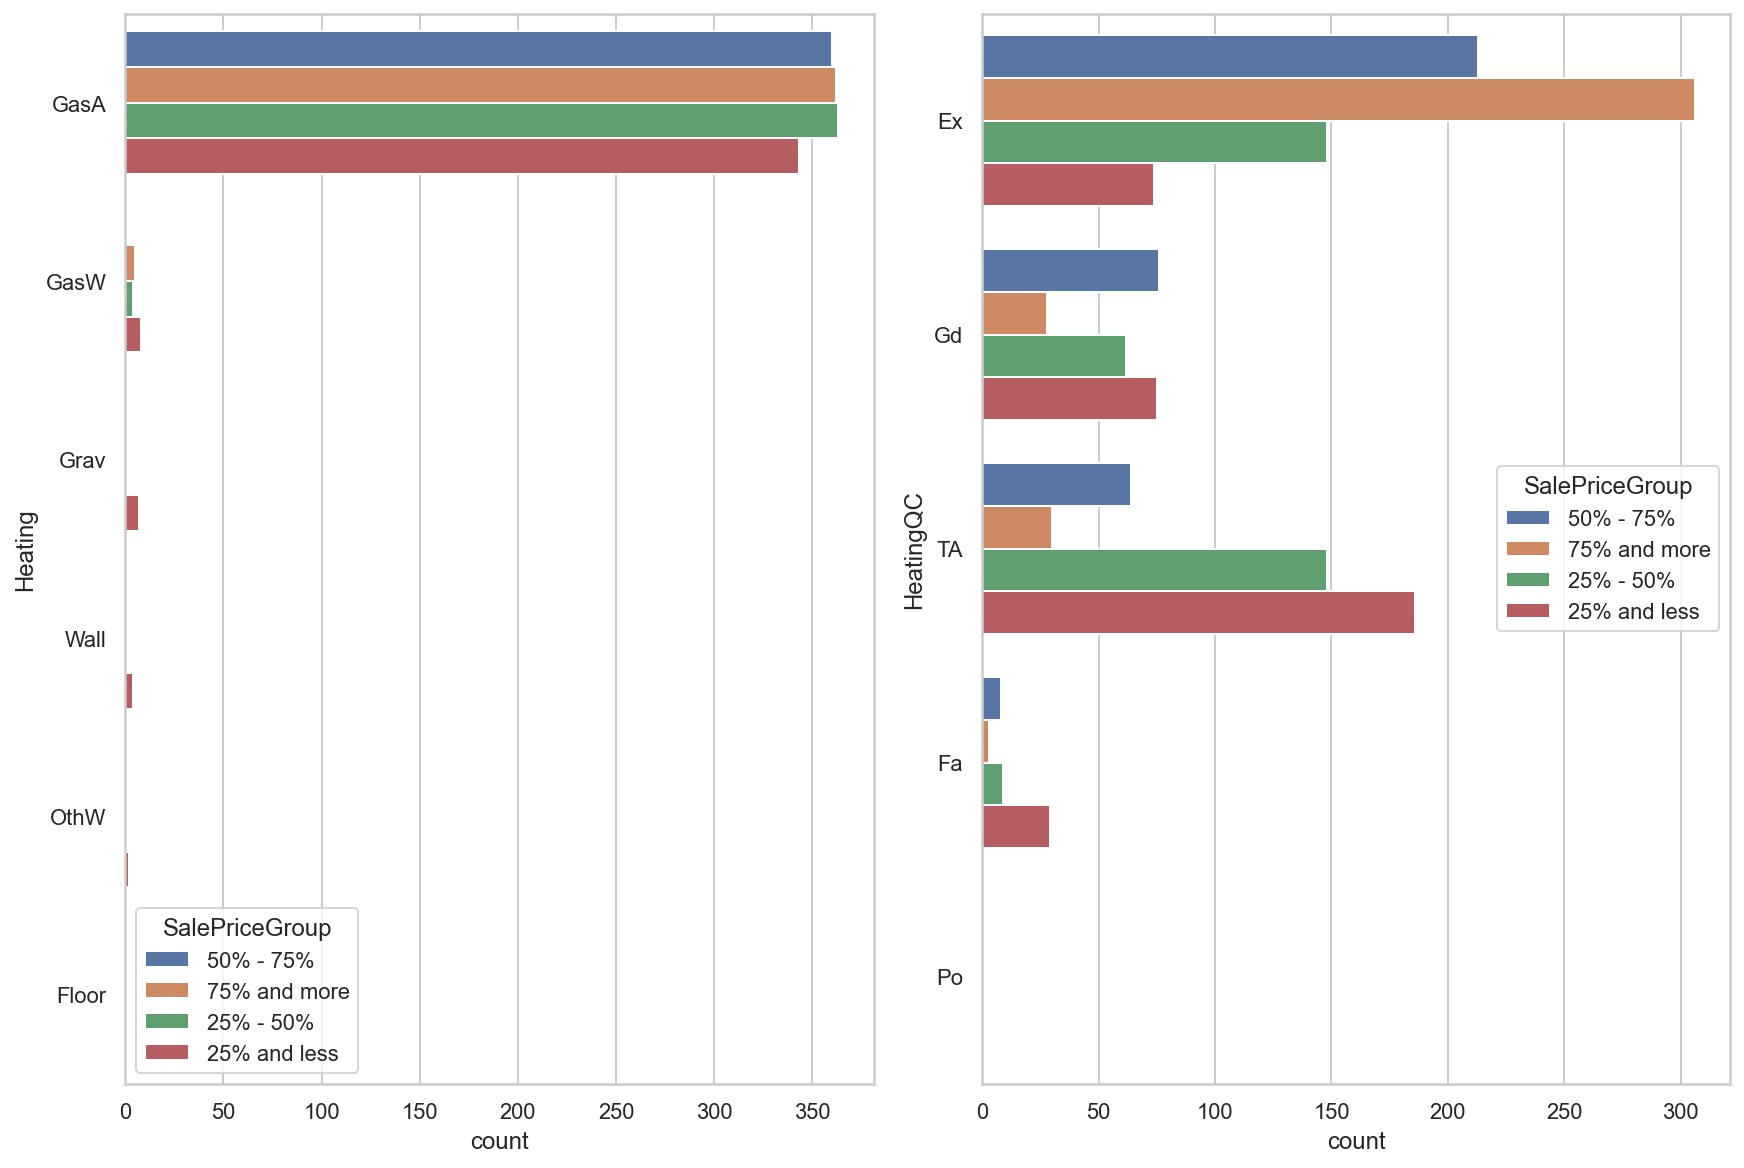

In [202]:
# Heating Types does differentiate samples with sale price below the mean
# Namely, wall, gravity, floor furneses and other heating were installed in houses that cheaper than the mean

# It seems like the mentioned heating systems are old fashin. Here is the YearBuilt ranges:
# Grav - 1910-1941
# Floor - 1949
# OthW - 1872-1917
# Wall - 1945-1952

# GasW - 1880-1970
# GasA - 1875-2010

## Most houses with SalePrice > 50% have from exellent to avarage qualtity of heating. Lower quality types includes mostly houses from < 50% percentile.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Heating", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="HeatingQC", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Electrical'>

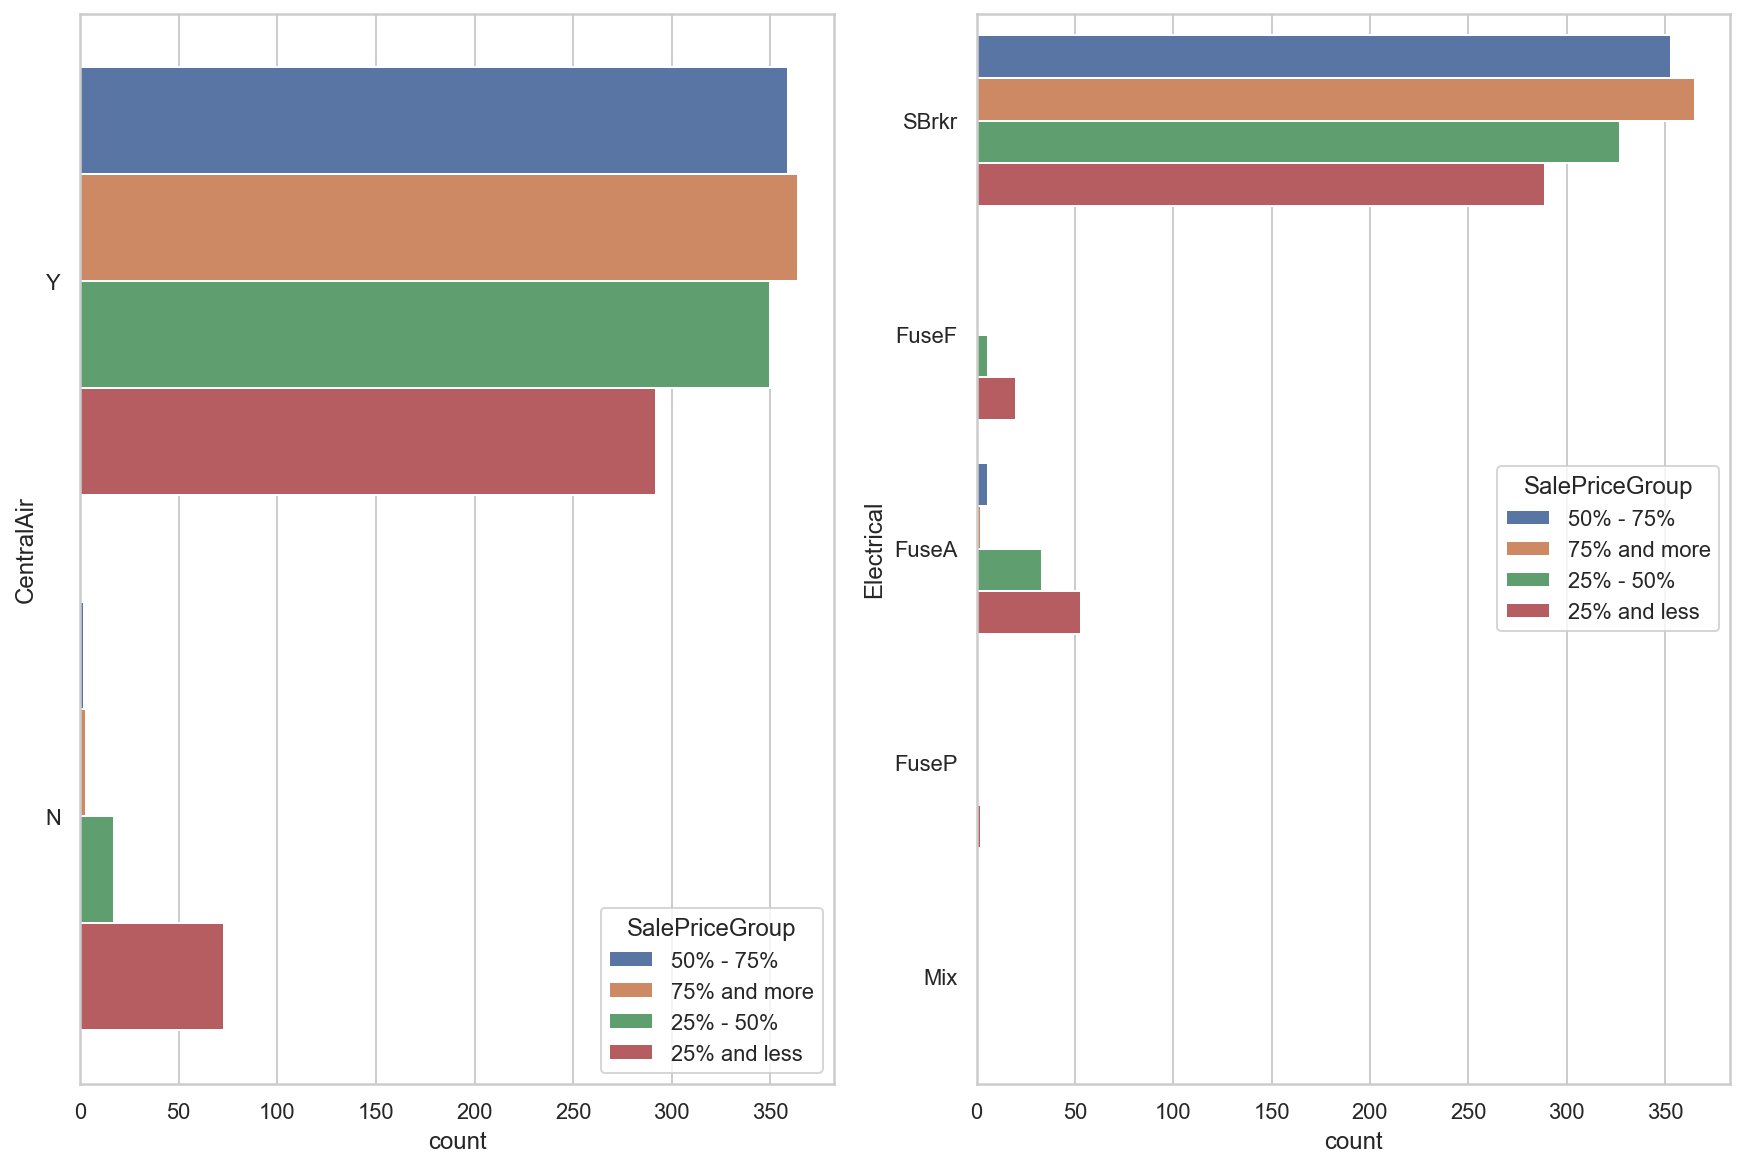

In [204]:
# Central AC seems to be an popular option in the dataset. Most of the houses from >50% percentile have it. 
# Central AC is not installed in cheap (<25% percentile) houses.
## More Info: https://www.thisoldhouse.com/heating-cooling/21018992/read-this-before-you-install-central-air-conditioning

# Most of the houses have "Standard Circuit Breakers & Romex" type of electricity. Houses from >50% dominates there. The rest of options are hold by <50% houses. They seem to be in the worst conditons.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="CentralAir", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Electrical", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Utilities'>

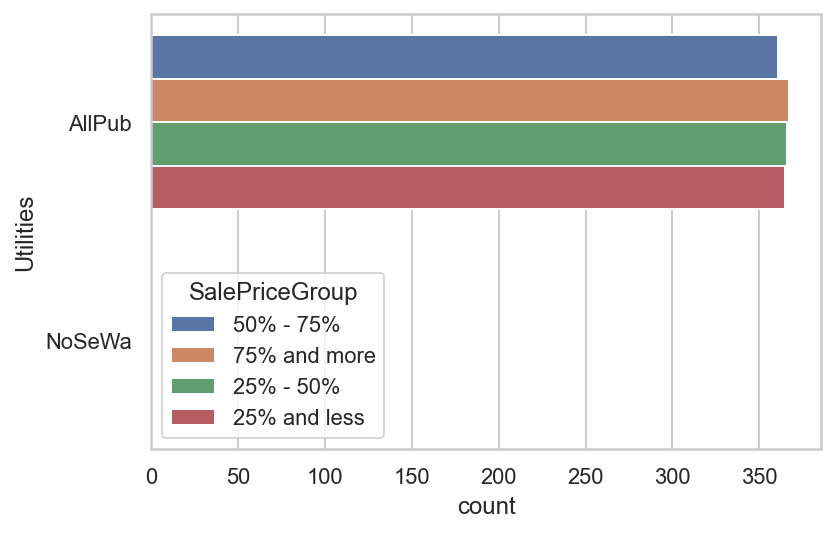

In [259]:
# Utilities feature has only one value in the dataset

sns.countplot(data=fullDf, y="Utilities", hue="SalePriceGroup")

In [260]:
fullDf[fullDf['Utilities'] != 'AllPub']

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
944       1344         0          0   NaN             3     1Fam       TA   
1915       810         0          0   NaN             1     1Fam      NaN   
1945      1474         0          0   NaN             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... TotRmsAbvGrd TotalBsmtSF  \
944            No       111.0       354.0  ...            7       819.0   
1915          NaN         0.0         0.0  ...            4         0.0   
1945           No         0.0         0.0  ...            7      1632.0   

      Utilities  WoodDeckSF YearBuilt  YearRemodAdd YrSold SalePriceGroup  \
944      NoSeWa           0      1958          1958   2009      25% - 50%   
1915        NaN         119      1910          1950   2009           None   
1945        NaN           0      1952          1952   2008           None   

     LivAreaSqFtPrice NonLivArea  
944        102.306548      13031  
1915              NaN      20970  
1945              NaN      29746  

[3 rows x 84 columns]

Kitchen Properties

<AxesSubplot:xlabel='count', ylabel='KitchenAbvGr'>

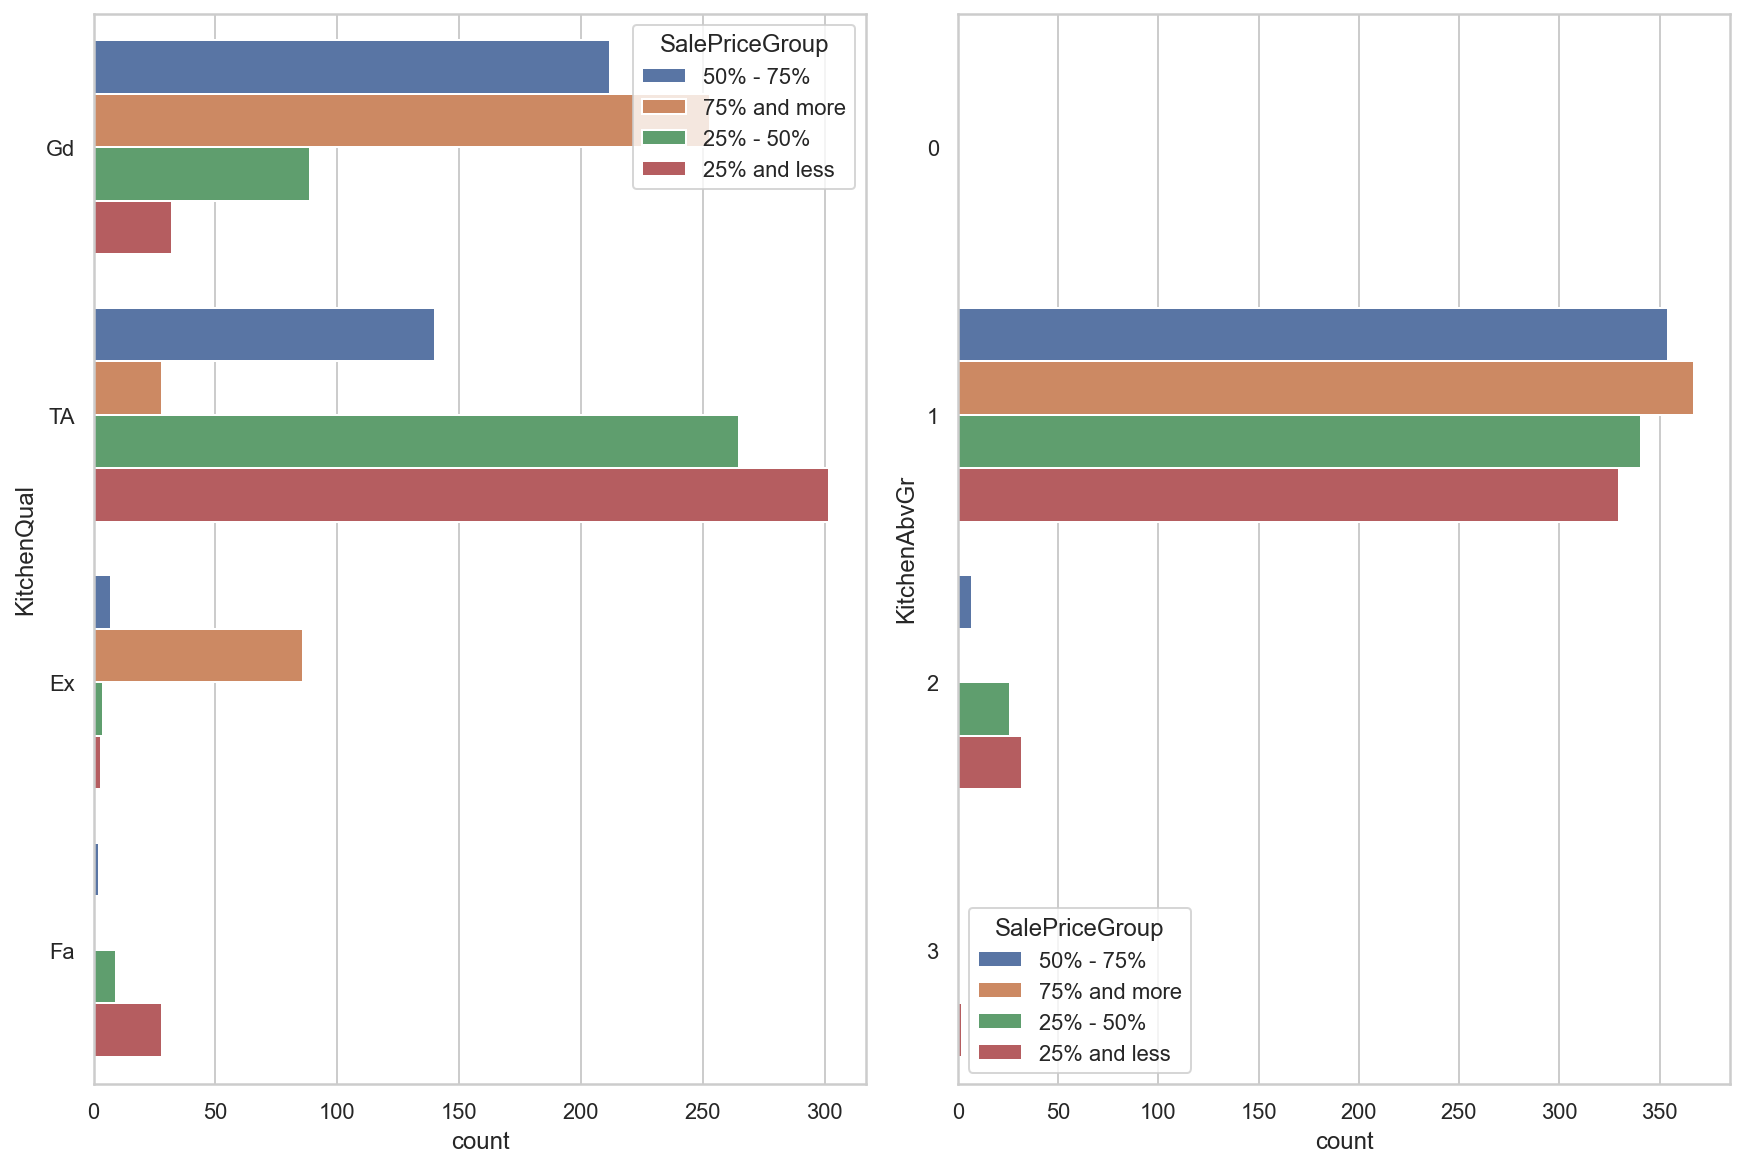

In [270]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="KitchenQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="KitchenAbvGr", hue="SalePriceGroup", ax=ax[1])

#### Garage Properties

<AxesSubplot:xlabel='count', ylabel='GarageCars'>

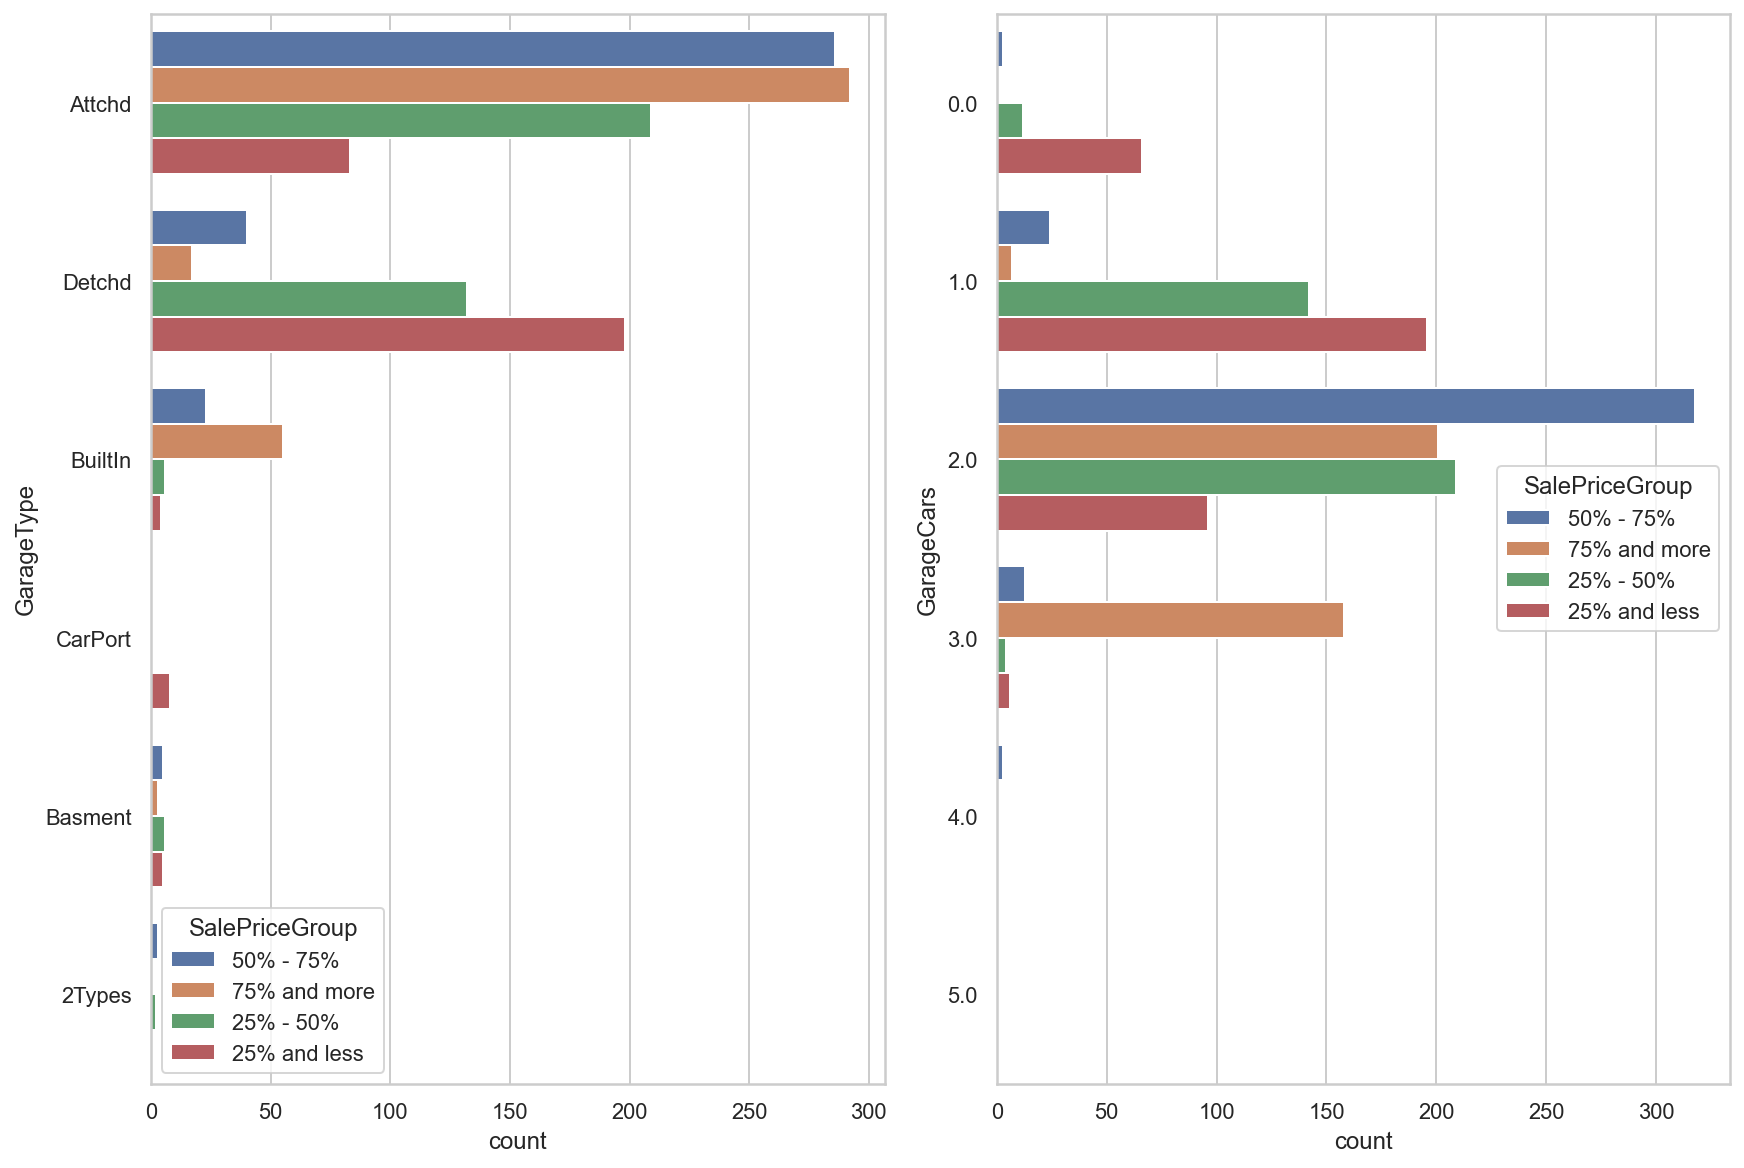

In [239]:
# Attached and Builtin garage types dominates among expensive houses (>50%). Their garages can contain 2 or 3 cars commonly. 
## Detached, CarPort types dominates among cheap houses (<50%). Their garage capacity is 1 car. No garages are also dominates among cheap houses.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="GarageType", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="GarageCars", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='GarageCond'>

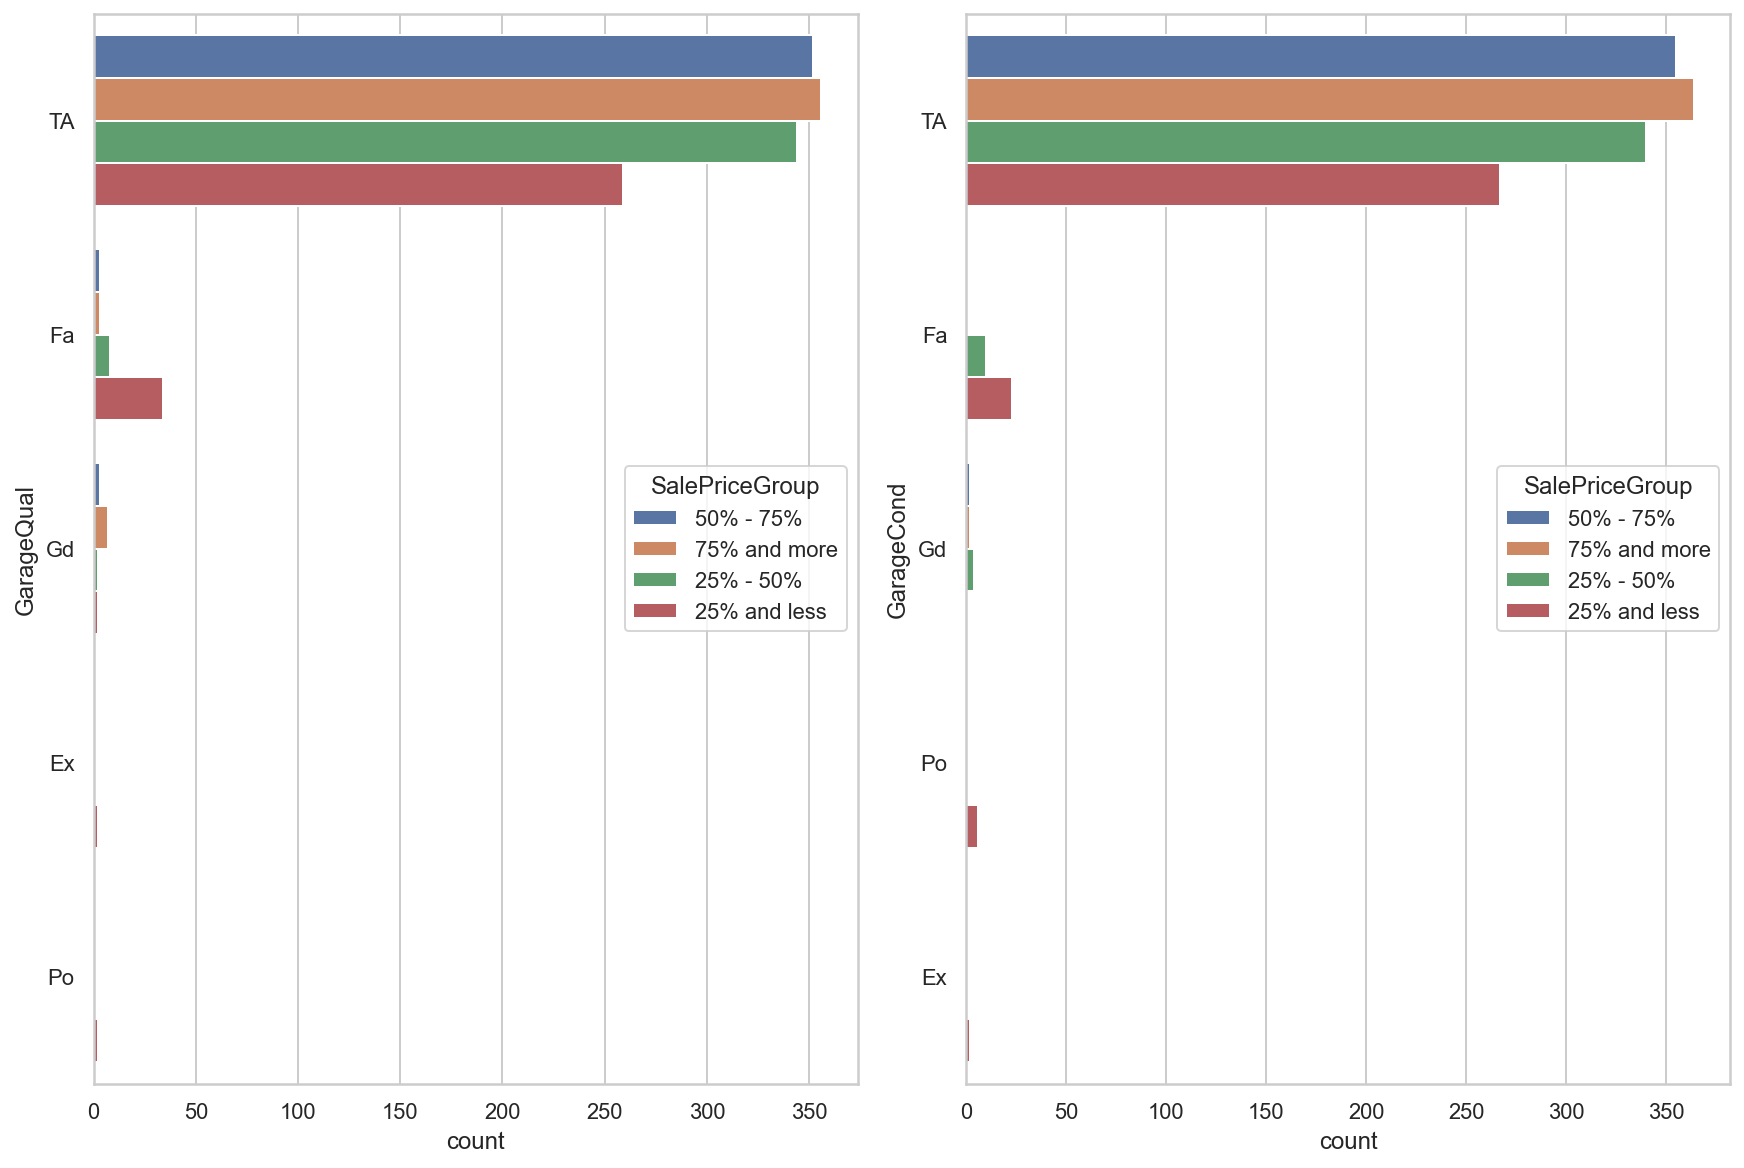

In [243]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="GarageQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="GarageCond", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='GarageFinish'>

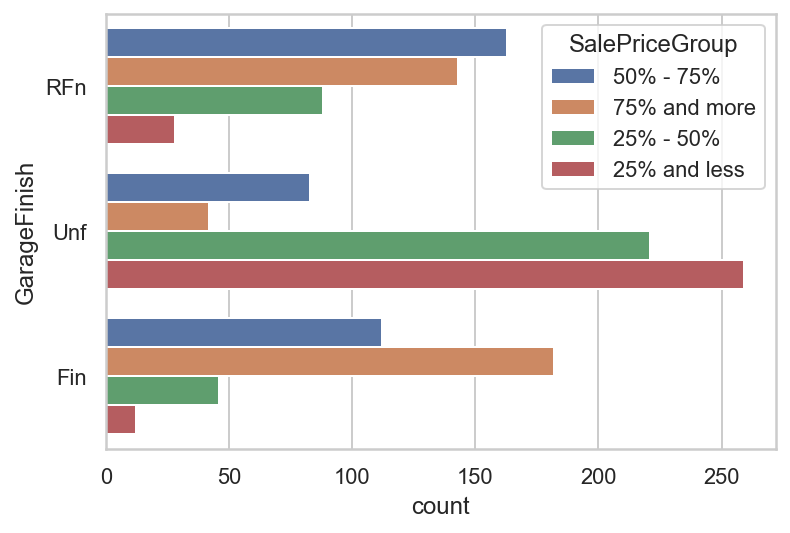

In [242]:
# Garage Finish correlates with house price. Most of the expensive houses (>50%) have garage finished or roughly finished. Unfinished garages were sold with cheap houses (<50%)

sns.countplot(data=fullDf, y="GarageFinish", hue="SalePriceGroup")

#### Fireplaces

<AxesSubplot:xlabel='count', ylabel='FireplaceQu'>

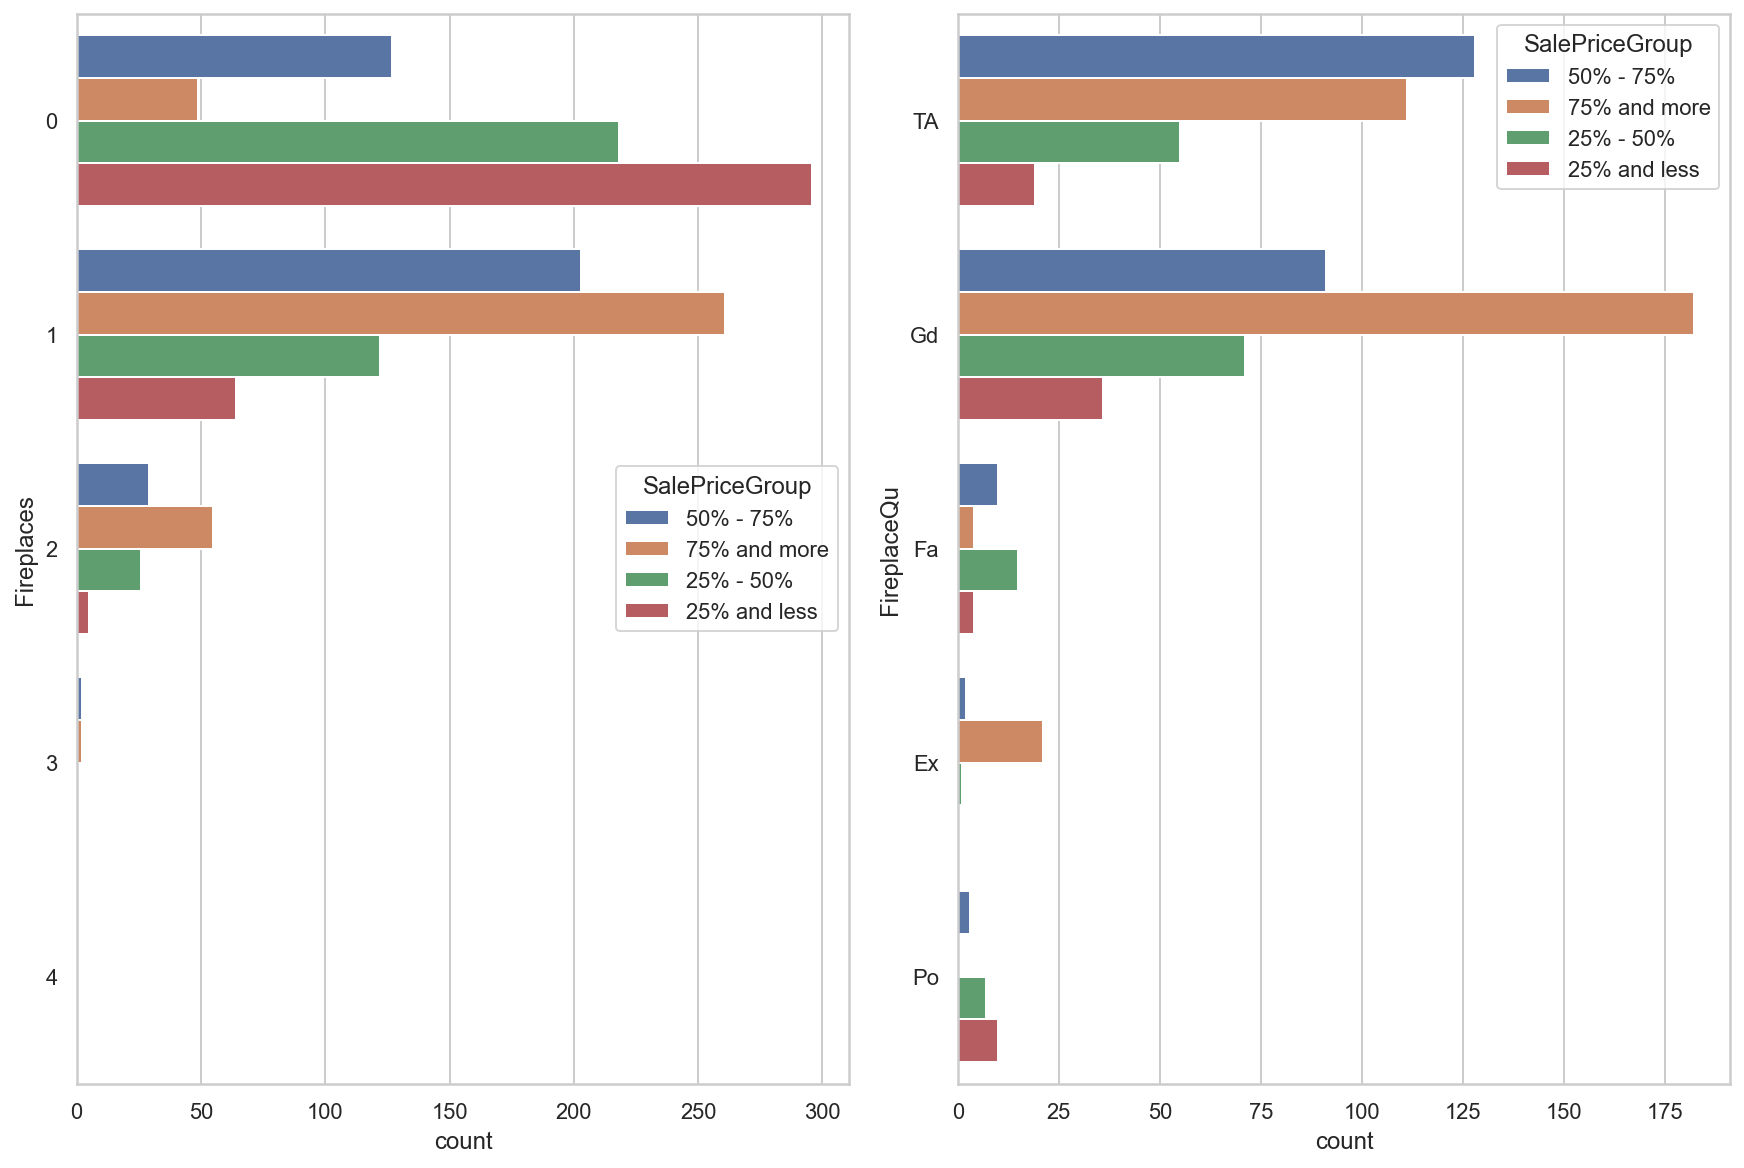

In [247]:
# Most of the cheap houses (<50%) don't have fireplaces or have one (most of the them are good or below avarage quality). Most of the expensive houses have 1 or 2 fireplaces with exellent, good or avarage quality.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Fireplaces", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="FireplaceQu", hue="SalePriceGroup", ax=ax[1])

#### Pool

<AxesSubplot:xlabel='count', ylabel='PoolQC'>

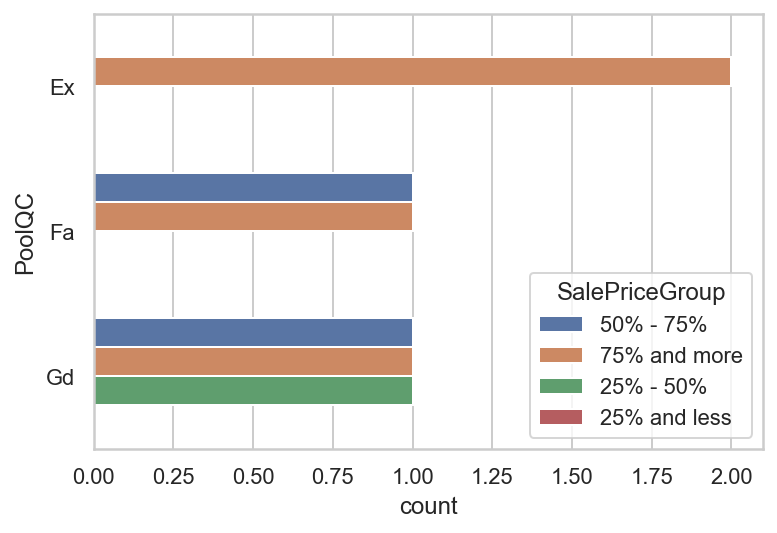

In [248]:
# Just a few lots have pools. None of houses that are cheaper than 25% have pools.
# There is an outlier with SalePrice < 50% and pool installed

sns.countplot(data=fullDf, y="PoolQC", hue="SalePriceGroup")

In [258]:
# Outlier

fullDf[(fullDf["SalePriceGroup"] == "25% - 50%") & (fullDf["PoolQC"] == 'Gd')][[
    'SalePrice',
    'PoolQC',
    'PoolArea',
    'TotRmsAbvGrd',
    'LotArea',
    'GrLivArea',
    'Neighborhood',
]]

SalePrice PoolQC  PoolArea  TotRmsAbvGrd  LotArea  GrLivArea  \
1298   160000.0     Gd       480            12    63887       5642   

     Neighborhood  
1298      Edwards

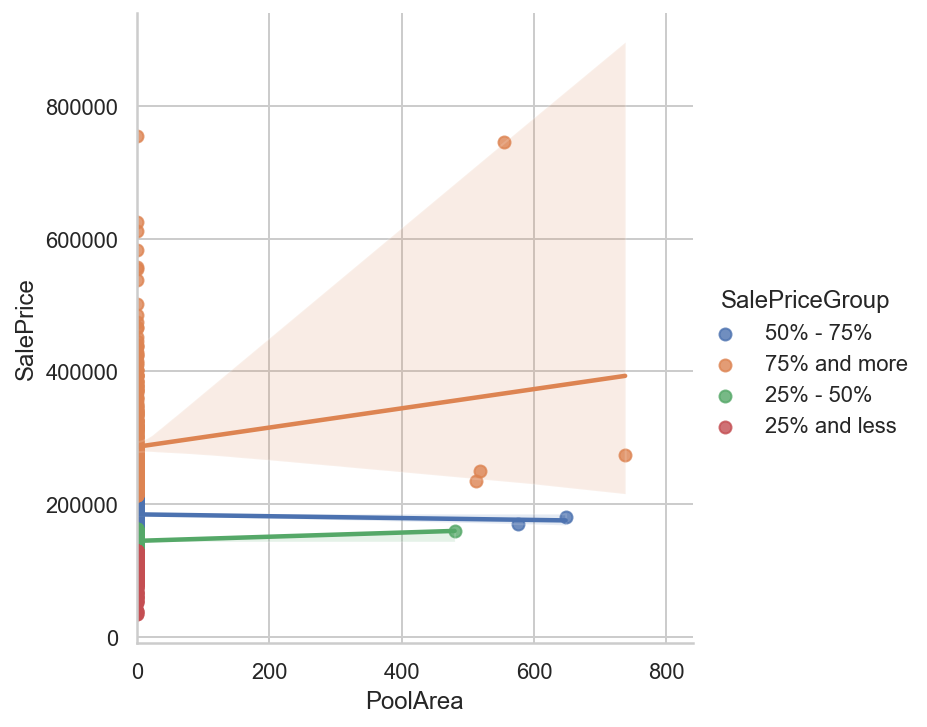

In [249]:
# ?
sns.lmplot(data=fullDf, x="PoolArea", y="SalePrice", hue="SalePriceGroup")

Fence

<AxesSubplot:xlabel='count', ylabel='Fence'>

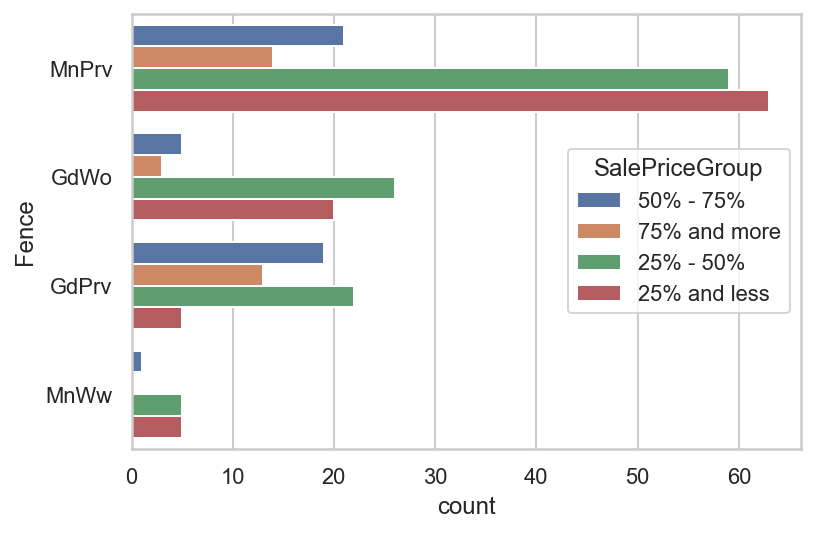

In [244]:
# Expensive houses (>50%) have good privacy/wood fences. Cheap houses (<50%) have minimal privacy/wood fences.

sns.countplot(data=fullDf, y="Fence", hue="SalePriceGroup")

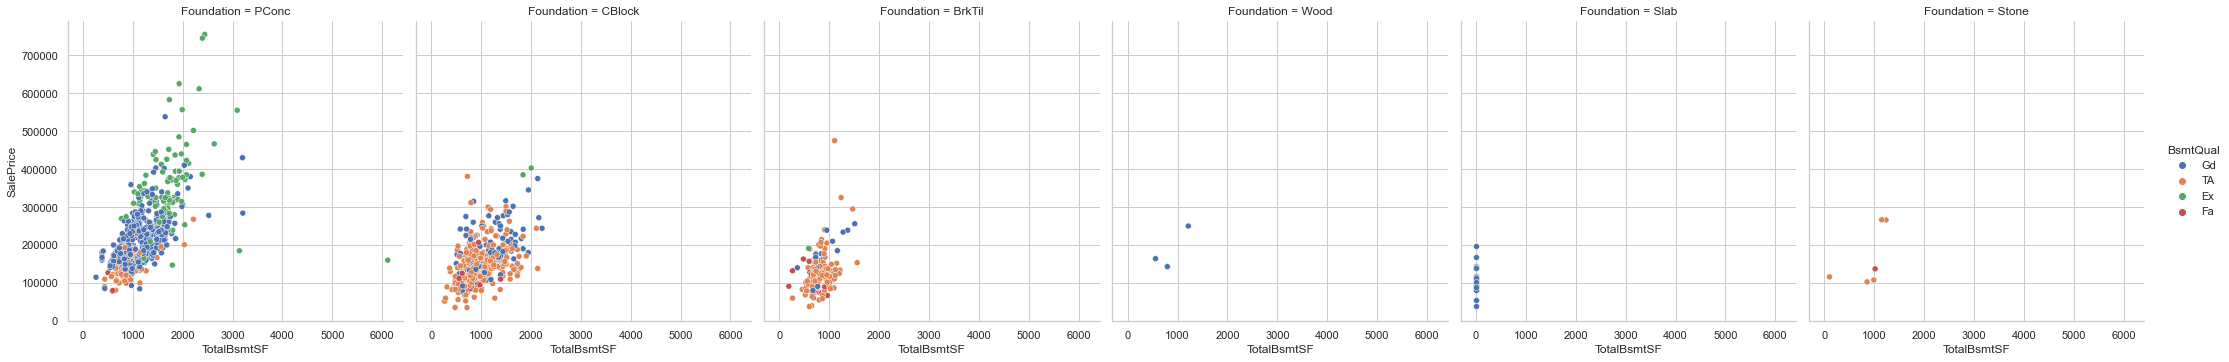

In [32]:
# Concl?

sns.relplot(x="TotalBsmtSF", y="SalePrice", hue="BsmtQual", col="Foundation", data=fullDf)

Sale Information

<AxesSubplot:xlabel='count', ylabel='SaleCondition'>

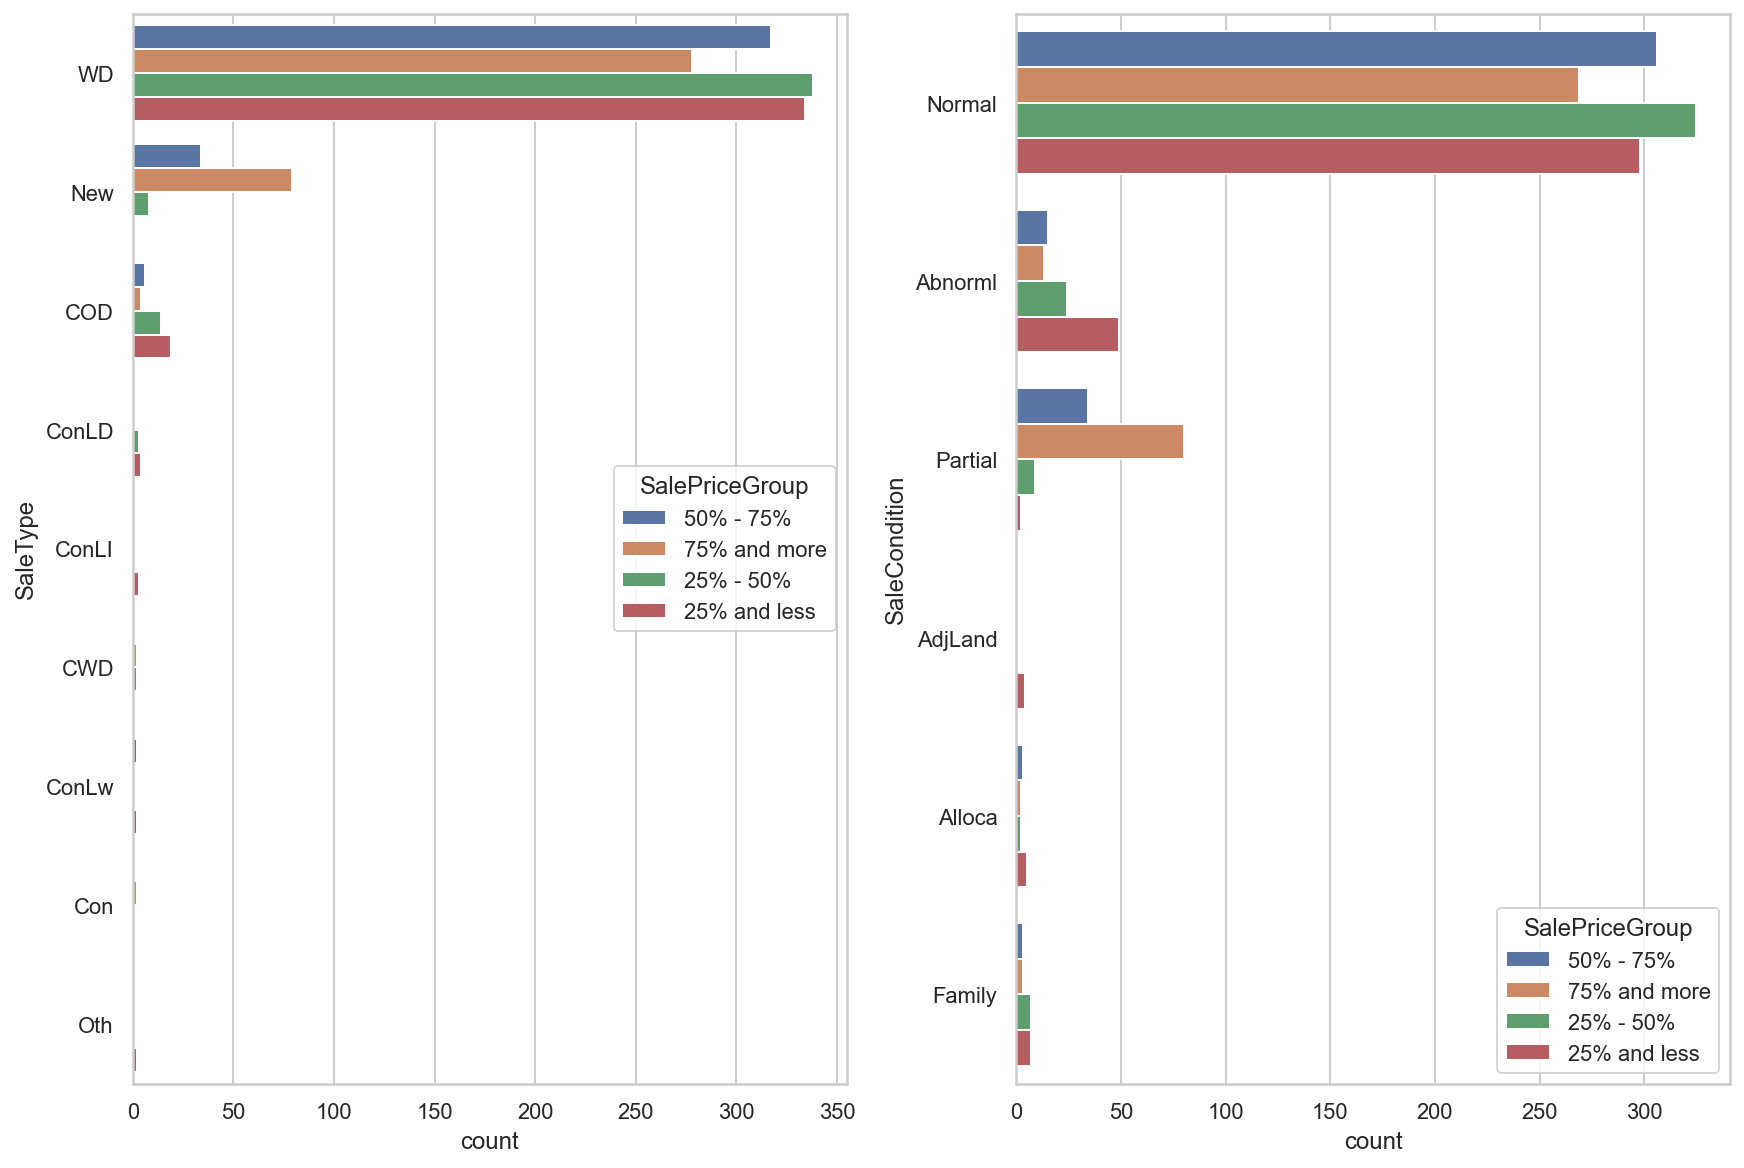

In [246]:


fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="SaleType", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="SaleCondition", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='MoSold,YrSold'>

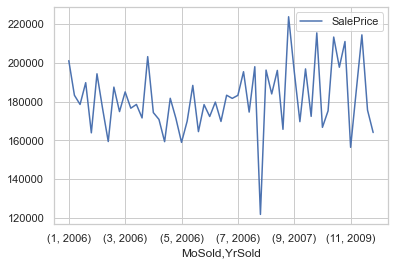

In [131]:
fullDf.groupby(['MoSold', 'YrSold'])[['SalePrice']].mean().plot()

### Correlation

<AxesSubplot:>

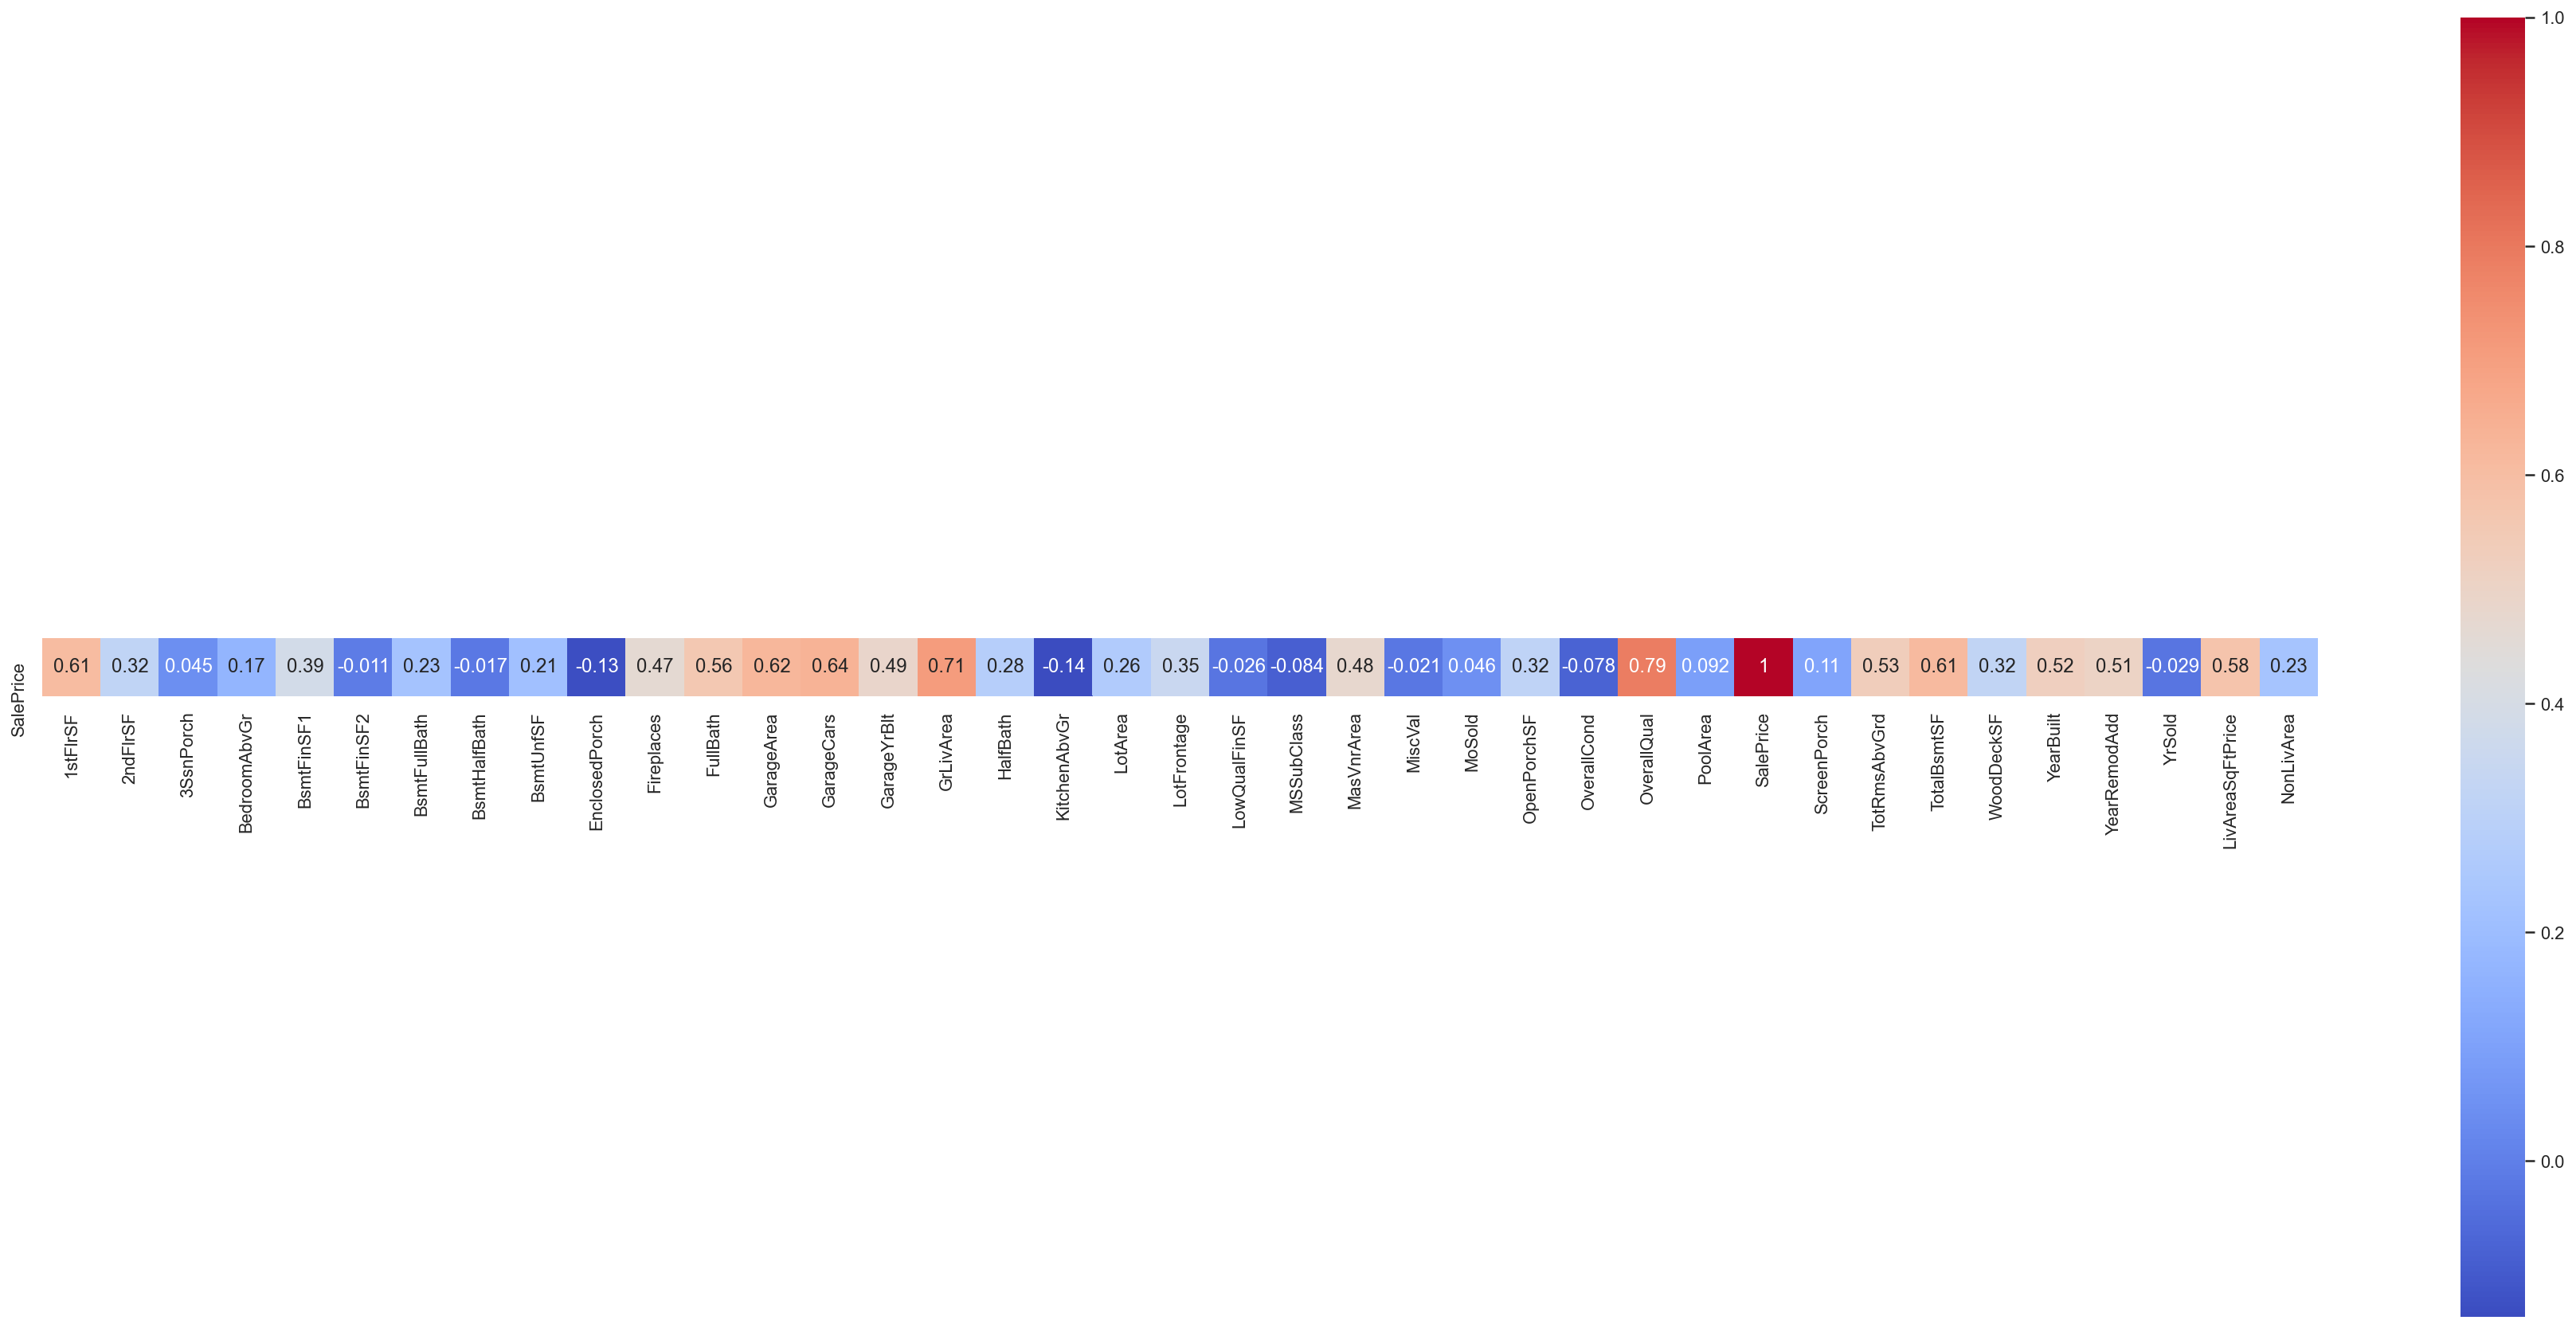

In [236]:
# Correlation between numerical features and SalePrice

plt.figure(figsize=(32, 15))
sns.heatmap(fullDf.drop(['Id'], axis=1).corr().loc[['SalePrice'],:], annot=True, square=True, cmap='coolwarm')